In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set(rc={'figure.figsize': [10, 10]}, font_scale=1.3)

In [2]:
df=pd.read_csv('../input/university-recommendation/original_data.csv')
df.sample(5)


,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,termAndYear,confPubs,ugCollege,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit
24217,vaibhavs,Computer Science,0,0,Information Security,290.0,MS,CE,6,0.0,...,Fall - 2006,0,SPCE,NaN,63.0,NaN,100,NaN,University of California Santa Barbara,0
6156,itsthamizh,Electrical Engineering,0,0,communications,96.0,MS,ELECTRONICS AND COMMUNICATION,NaN,0.0,...,Fall - 2010,0,Panimalar Engineering College,NaN,75.0,NaN,100,NaN,University of Texas Dallas,0
14973,Rooju,Computer Science,0,0,Computer Architecture/Embedded Systems,290.0,MS,Computer Engineering,5.5,0.0,...,Fall - 2006,0,Dharamsinh Desai University,NaN,76.2,NaN,100,NaN,University of Massachusetts Amherst,1
43729,shanster,Computer Science,0,0,Networking,114.0,MS,CS,NaN,0.0,...,Fall - 2011,0,Anna University,NaN,75.3,NaN,100,NaN,New York University,1
19801,herambgadekar,Computer Science,0,0,NaN,97.0,MS,Computer Engineering,NaN,0.0,...,Fall - 2012,0,Pune University,NaN,70.0,NaN,100,NaN,University of Florida,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userName         53644 non-null  object 
 1   major            53257 non-null  object 
 2   researchExp      53644 non-null  int64  
 3   industryExp      53644 non-null  int64  
 4   specialization   31949 non-null  object 
 5   toeflScore       49230 non-null  float64
 6   program          53322 non-null  object 
 7   department       53643 non-null  object 
 8   toeflEssay       11874 non-null  object 
 9   internExp        53630 non-null  float64
 10  greV             52388 non-null  float64
 11  greQ             52424 non-null  float64
 12  userProfileLink  53644 non-null  object 
 13  journalPubs      53322 non-null  object 
 14  greA             50786 non-null  float64
 15  topperCgpa       53641 non-null  float64
 16  termAndYear      53322 non-null  object 
 17  confPubs    

In [4]:
df.describe()

,researchExp,industryExp,toeflScore,internExp,greV,greQ,greA,topperCgpa,gmatA,cgpa,gmatQ,cgpaScale,gmatV,admit
count,53644.000000,53644.000000,49230.000000,53630.000000,52388.000000,52424.000000,50786.000000,53641.000000,119.000000,53644.000000,123.000000,53644.000000,114.000000,53644.000000
mean,0.339535,4.056539,109.558826,0.454317,324.457108,422.485999,5.065241,35.754780,6.117647,39.343456,49.325203,55.264820,34.885965,0.521121
std,2.602942,12.028282,35.851480,2.482900,214.403370,320.238652,36.843511,37.442863,12.612327,33.240369,22.288531,45.638637,21.973741,0.499558
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,8.000000,0.000000,19.000000,0.000000
25%,0.000000,0.000000,101.000000,0.000000,152.000000,162.000000,3.000000,8.100000,4.000000,8.170000,46.000000,10.000000,27.000000,0.000000
50%,0.000000,0.000000,107.000000,0.000000,159.000000,168.000000,3.500000,9.600000,5.000000,10.000000,48.000000,100.000000,31.000000,1.000000
75%,0.000000,0.000000,111.000000,0.000000,550.000000,780.000000,4.000000,80.000000,5.000000,71.727500,50.000000,100.000000,34.000000,1.000000
max,53.000000,138.000000,1350.000000,96.000000,5560.000000,7990.000000,1470.000000,100.000000,102.000000,833.000000,168.000000,100.000000,152.000000,1.000000


In [5]:
df.columns

Index(['userName', 'major', 'researchExp', 'industryExp', 'specialization',
       'toeflScore', 'program', 'department', 'toeflEssay', 'internExp',
       'greV', 'greQ', 'userProfileLink', 'journalPubs', 'greA', 'topperCgpa',
       'termAndYear', 'confPubs', 'ugCollege', 'gmatA', 'cgpa', 'gmatQ',
       'cgpaScale', 'gmatV', 'univName', 'admit'],
      dtype='object')

In [6]:
for col in [ 'major', 'researchExp', 'industryExp', 'specialization',
       'toeflScore', 'program', 'department', 'toeflEssay', 'internExp',
       'greV', 'greQ', 'userProfileLink', 'journalPubs', 'greA', 'topperCgpa',
       'termAndYear', 'confPubs', 'ugCollege', 'gmatA', 'cgpa', 'gmatQ',
       'cgpaScale', 'gmatV']:
    print(f'-------{col}-------')
    print(df[col].unique())
    print('________________________'*3)

-------major-------
['Systems and Control' 'Manufacturing Engineering'
 '(MIS / MSIM / MSIS / MSIT)' nan 'MIS' 'MIS-management related courses'
 'Computer Science' 'Mechanical Engineering' 'Robotics'
 'Electronics and Communication' 'Information Systems'
 'Human Computer Interaction' 'Electrical Engineering' 'Game Development'
 'Information Technology' 'Finance'
 'Computer Graphics and Game Technology' 'Computer Engineering'
 'Computer Engineering / Computer Networking / Computer Science'
 'Telecommunication' 'Management Information System' 'Data Science'
 'Electronic and Telecommunication Engineering' 'Biomedical Engineering'
 'Industrial Engineering' 'CS' 'Biotechnology/bio-engineering'
 'software engineering' 'Mechatronics/Robotics' 'Engineering Management'
 'Automotive Engineering' 'Mechanical / Industrial Engg.'
 'renewable energy' 'bio medical science'
 'Electrical and Computer Engineering' 'Industrial Engg/Robotics'
 'Computational Science and Engineering' 'Electrical Engg/ comp

In [7]:
df['department'].value_counts()

Computer Science                  5003
ECE                               4231
Information Technology            2915
CSE                               2598
Computer Engineering              2190
                                  ... 
SSE                                  1
Compter Science and Technology       1
Dept. of ECE                         1
E.C.E.                               1
TC                                   1
Name: department, Length: 1486, dtype: int64

In [8]:
df['major'].value_counts()

Computer Science                    20273
Electrical Engineering               6287
MIS                                  4557
Electronics and Communication        3224
Mechanical Engineering               2806
                                    ...  
Earth and Environmental Sciences        1
oral biology                            1
fire protection engineering             1
Business Management                     1
ASTRONOMY / ASTROPHYSICS                1
Name: major, Length: 244, dtype: int64

In [9]:
df['confPubs'].value_counts()

0              51656
1               1046
2                353
3                135
4                 71
5                 28
8                 10
6                  8
Fall - 2015        7
Fall - 2012        4
Fall - 2014        3
15                 1
Name: confPubs, dtype: int64

In [10]:
df['ugCollege'].value_counts()

MU                                             3763
VTU                                            3189
Anna University                                2206
Pune University                                1458
JNTU                                           1176
                                               ... 
CQUT                                              1
kaushik college of engg                           1
D.A.V college                                     1
MGM's College of Engineering and Technology       1
National Institute of Engineerint VTU             1
Name: ugCollege, Length: 1822, dtype: int64

In [11]:
df['program'].value_counts()

MS                 50949
PhD                  974
MS/PhD               962
Both MS and PhD      437
Name: program, dtype: int64

In [12]:
df['termAndYear'].value_counts()

Fall - 2013       10373
Fall - 2011       10089
Fall - 2012       10034
Fall - 2014        9038
Fall - 2015        6375
Fall               1090
Fall - 2006         806
Spring - 2014       792
Spring - 2013       752
Spring - 2012       730
Spring - 2015       566
Fall - 2010         559
Fall - 2007         472
Spring - 2011       382
Spring - 2016       341
Fall - 2008         248
Fall - 2009         211
Fall - 2016         130
Spring               28
Spring - 2008        27
Summer - 2013        23
Fall - 14            22
Fall - 13            21
Spring - 2010        21
Spring - 2007        17
Fall - 2             17
Spring - 2009        16
Fall - 2005          15
Summer - 2015        15
Summer - 2014        14
Fall - 11            11
Fall - 12             9
Summer - 2012         9
Fall - 15             9
0                     7
Summer - 2016         7
Fall - 6              6
Fall - 2103           5
Summer - 2011         5
8.89                  4
Fall - 215            3
Summer          

In [13]:
df['userProfileLink'].value_counts()

http://www.edulix.com/unisearch/user.php?uid=153495    18
http://www.edulix.com/unisearch/user.php?uid=9627      17
http://www.edulix.com/unisearch/user.php?uid=262586    17
http://www.edulix.com/unisearch/user.php?uid=214536    17
http://www.edulix.com/unisearch/user.php?uid=269235    16
                                                       ..
http://www.edulix.com/unisearch/user.php?uid=252508     1
http://www.edulix.com/unisearch/user.php?uid=9278       1
http://www.edulix.com/unisearch/user.php?uid=268836     1
http://www.edulix.com/unisearch/user.php?uid=5697       1
http://www.edulix.com/unisearch/user.php?uid=143797     1
Name: userProfileLink, Length: 14798, dtype: int64

In [14]:
def sum_scor(scor):
    calc_scor = scor['researchExp']+scor['industryExp']+scor['toeflScore']+scor['internExp']+scor['greQ']+scor['greA']+scor['topperCgpa']+scor['cgpa']
    return calc_scor

In [15]:
df['total_scor']=df.apply(sum_scor,axis=1)
df

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,confPubs,ugCollege,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor
0,143saf,Systems and Control,0,18,Robotics,112.0,MS,Instrumentation & Control,26,5.0,...,0,Dharamsinh Desai University,NaN,8.50,NaN,10,NaN,Worcester Polytechnic Institute,1,323.90
1,7790ashish,Manufacturing Engineering,0,0,NaN,NaN,MS,0,NaN,0.0,...,0,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1,NaN
2,AB25,(MIS / MSIM / MSIS / MSIT),0,66,NaN,94.0,MS,Computer Engineering,21,0.0,...,0,IET DAVV,NaN,78.28,NaN,100,NaN,Worcester Polytechnic Institute,1,479.28
3,abhijitg,NaN,0,0,NaN,NaN,NaN,0,NaN,0.0,...,NaN,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1,NaN
4,abhijitgang,MIS,0,0,NaN,81.0,MS,computer,NaN,0.0,...,0,Pune University,NaN,57.00,NaN,100,NaN,Worcester Polytechnic Institute,1,980.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53639,zapp11,Mechanical Engineering,0,24,Thermal Sciences,98.0,MS,Production Engineering,24,12.0,...,0,University of Mumbai,NaN,71.00,NaN,100,NaN,Arizona State University,0,360.00
53640,zathurian,Electronics and Communication,0,0,Communication,115.0,MS,Electronics and Communication Engineering,30,0.0,...,0,BITS Hyderabad,NaN,6.50,NaN,10,NaN,Arizona State University,0,936.00
53641,zeal_vyas,Electrical Engineering,0,0,Computer Networks/Telecommunications,NaN,MS,Electronics and Telecommunication,NaN,0.0,...,0,NMIMS,NaN,3.55,NaN,4,NaN,Arizona State University,0,NaN
53642,zidanefaraday,Electrical Engineering,0,0,Power System Electric Machinery,99.0,MS,University Institute of Engineering and Techno...,NaN,0.0,...,0,Panjab University,NaN,70.50,NaN,100,NaN,Arizona State University,0,1019.00


In [16]:
df['season']=df['termAndYear'] .str.split('-').str[0]
df.head()

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,ugCollege,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season
0,143saf,Systems and Control,0,18,Robotics,112.0,MS,Instrumentation & Control,26,5.0,...,Dharamsinh Desai University,NaN,8.50,NaN,10,NaN,Worcester Polytechnic Institute,1,323.90,Fall
1,7790ashish,Manufacturing Engineering,0,0,NaN,NaN,MS,0,NaN,0.0,...,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1,NaN,Fall
2,AB25,(MIS / MSIM / MSIS / MSIT),0,66,NaN,94.0,MS,Computer Engineering,21,0.0,...,IET DAVV,NaN,78.28,NaN,100,NaN,Worcester Polytechnic Institute,1,479.28,Fall
3,abhijitg,NaN,0,0,NaN,NaN,NaN,0,NaN,0.0,...,NaN,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1,NaN,NaN
4,abhijitgang,MIS,0,0,NaN,81.0,MS,computer,NaN,0.0,...,Pune University,NaN,57.00,NaN,100,NaN,Worcester Polytechnic Institute,1,980.50,Fall


In [17]:
df['Year']=df['termAndYear'] .str.split('-').str[1]
df.head()

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
0,143saf,Systems and Control,0,18,Robotics,112.0,MS,Instrumentation & Control,26,5.0,...,NaN,8.50,NaN,10,NaN,Worcester Polytechnic Institute,1,323.90,Fall,2015
1,7790ashish,Manufacturing Engineering,0,0,NaN,NaN,MS,0,NaN,0.0,...,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1,NaN,Fall,2013
2,AB25,(MIS / MSIM / MSIS / MSIT),0,66,NaN,94.0,MS,Computer Engineering,21,0.0,...,NaN,78.28,NaN,100,NaN,Worcester Polytechnic Institute,1,479.28,Fall,2015
3,abhijitg,NaN,0,0,NaN,NaN,NaN,0,NaN,0.0,...,NaN,0.00,NaN,0,NaN,Worcester Polytechnic Institute,1,NaN,NaN,NaN
4,abhijitgang,MIS,0,0,NaN,81.0,MS,computer,NaN,0.0,...,NaN,57.00,NaN,100,NaN,Worcester Polytechnic Institute,1,980.50,Fall,2011


In [18]:
df['Year'] = pd.to_datetime(df['Year'], format='%Y/%m/%d', errors='coerce')
df['Year'] = df['Year'].dt.year

In [19]:
df['Year'].unique

<bound method Series.unique of 0        2015.0
1        2013.0
2        2015.0
3           NaN
4        2011.0
          ...  
53639    2014.0
53640    2012.0
53641    2013.0
53642    2011.0
53643    2011.0
Name: Year, Length: 53644, dtype: float64>

In [20]:
from sklearn.impute import SimpleImputer , KNNImputer

In [21]:
imputer = KNNImputer()

In [22]:
df['Year'] = imputer.fit_transform(df[['Year']])

In [23]:
df['Year']=df['Year'].apply(int)


In [24]:
df['Year'].value_counts()

2012    12335
2013    11148
2011    10476
2014     9844
2015     6956
2006      806
2010      580
2007      489
2016      478
2008      275
2009      227
2005       15
2103        5
2017        3
1992        2
2105        2
1989        1
1990        1
2112        1
Name: Year, dtype: int64

In [25]:
for col in [ 'researchExp','industryExp','toeflScore','internExp','greQ','greA','topperCgpa','cgpa','cgpaScale','toeflEssay','journalPubs','confPubs']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
    

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userName         53644 non-null  object 
 1   major            53257 non-null  object 
 2   researchExp      53644 non-null  int64  
 3   industryExp      53644 non-null  int64  
 4   specialization   31949 non-null  object 
 5   toeflScore       49230 non-null  float64
 6   program          53322 non-null  object 
 7   department       53643 non-null  object 
 8   toeflEssay       11863 non-null  float64
 9   internExp        53630 non-null  float64
 10  greV             52388 non-null  float64
 11  greQ             52424 non-null  float64
 12  userProfileLink  53644 non-null  object 
 13  journalPubs      53308 non-null  float64
 14  greA             50786 non-null  float64
 15  topperCgpa       53641 non-null  float64
 16  termAndYear      53322 non-null  object 
 17  confPubs    

## Data Analysis

### max in the industry Exp

In [27]:
df[df['industryExp']==df['industryExp'].max()]

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
44999,infosec18,Information Security,0,138,NaN,NaN,MS,Computer Science,NaN,0.0,...,NaN,2.0,NaN,4,NaN,Georgia Institute of Technology,1,NaN,Fall,2015


### max in the toefl Score

In [28]:
df[df['toeflScore']==df['toeflScore'].max()]

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
19539,anupam.nandan@gmail.com,Computer Engineering,0,0,NaN,1350.0,MS,cse,3.0,0.0,...,NaN,0.0,NaN,0,NaN,University of Florida,1,2103.0,Fall,2012


### max in theresearch Exp

In [29]:
df[df['researchExp']==df['researchExp'].max()]

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
246,Prashanthslm,Industrial Engineering,53,53,NaN,95.0,MS,Mechanical,NaN,3.0,...,NaN,7.48,NaN,10,NaN,Wayne State University,1,375.88,Fall,2015
44236,Prashanthslm,Industrial Engineering,53,53,NaN,95.0,MS,Mechanical,NaN,3.0,...,NaN,7.48,NaN,10,NaN,New Jersey Institute of Technology,1,375.88,Fall,2015




### Students' scores in universities in exams

In [30]:
df.groupby("univName").describe()[['toeflScore','internExp','topperCgpa']].transpose()

univName          Arizona State University  \
toeflScore count               2907.000000   
           mean                 108.442036   
           std                   33.836033   
           min                    0.000000   
           25%                   99.000000   
           50%                  105.000000   
           75%                  110.000000   
           max                 1004.000000   
internExp  count               3175.000000   
           mean                   0.435591   
           std                    1.651466   
           min                    0.000000   
           25%                    0.000000   
           50%                    0.000000   
           75%                    0.000000   
           max                   24.000000   
topperCgpa count               3175.000000   
           mean                  35.751966   
           std                   37.519184   
           min                    0.000000   
           25%                    8.800000   
           50%                    9.600000   
           75%                   80.000000   
           max                  100.000000   

univName          California Institute of Technology  \
toeflScore count                           30.000000   
           mean                           103.233333   
           std                             20.235993   
           min                              7.000000   
           25%                            104.000000   
           50%                            107.500000   
           75%                            112.750000   
           max                            118.000000   
internExp  count                           54.000000   
           mean                             0.222222   
           std                              1.003140   
           min                              0.000000   
           25%                              0.000000   
           50%                              0.000000   
           75%                              0.000000   
           max                              6.000000   
topperCgpa count                           54.000000   
           mean                            21.292278   
           std                             32.245708   
           min                              0.000000   
           25%                              0.000000   
           50%                              9.150000   
           75%                              9.940000   
           max                             90.000000   

univName          Carnegie Mellon University  Clemson University  \
toeflScore count                 1289.000000          707.000000   
           mean                   110.118697          103.545969   
           std                     22.420925           24.833989   
           min                      7.000000            0.000000   
           25%                    105.000000           96.000000   
           50%                    110.000000          104.000000   
           75%                    114.000000          109.000000   
           max                    680.000000          290.000000   
internExp  count                 1412.000000          779.000000   
           mean                     0.359773            0.359435   
           std                      1.620920            1.666762   
           min                      0.000000            0.000000   
           25%                      0.000000            0.000000   
           50%                      0.000000            0.000000   
           75%                      0.000000            0.000000   
           max                     24.000000           20.000000   
topperCgpa count                 1412.000000          779.000000   
           mean                    32.248612           38.176318   
           std                     36.634571           37.900995   
           min                      0.000000            0.000000   
           25%      

In [31]:
df.groupby("univName").describe()[['topperCgpa','cgpa','cgpaScale']].transpose()

univName          Arizona State University  \
topperCgpa count               3175.000000   
           mean                  35.751966   
           std                   37.519184   
           min                    0.000000   
           25%                    8.800000   
           50%                    9.600000   
           75%                   80.000000   
           max                  100.000000   
cgpa       count               3176.000000   
           mean                  38.256379   
           std                   33.057561   
           min                    0.000000   
           25%                    8.040000   
           50%                    9.240000   
           75%                   72.500000   
           max                   99.000000   
cgpaScale  count               3176.000000   
           mean                  53.011650   
           std                   45.464630   
           min                    0.000000   
           25%                   10.000000   
           50%                   10.000000   
           75%                  100.000000   
           max                  100.000000   

univName          California Institute of Technology  \
topperCgpa count                           54.000000   
           mean                            21.292278   
           std                             32.245708   
           min                              0.000000   
           25%                              0.000000   
           50%                              9.150000   
           75%                              9.940000   
           max                             90.000000   
cgpa       count                           54.000000   
           mean                            24.340056   
           std                             32.589809   
           min                              0.000000   
           25%                              3.700000   
           50%                              8.265000   
           75%                             47.400750   
           max                             88.000000   
cgpaScale  count                           54.000000   
           mean                            36.018519   
           std                             43.922956   
           min                              0.000000   
           25%                              4.250000   
           50%                             10.000000   
           75%                            100.000000   
           max                            100.000000   

univName          Carnegie Mellon University  Clemson University  \
topperCgpa count                 1412.000000          779.000000   
           mean                    32.248612           38.176318   
           std                     36.634571           37.900995   
           min                      0.000000            0.000000   
           25%                      0.000000            8.205000   
           50%                      9.585000            9.500000   
           75%                     78.000000           80.000000   
           max                    100.000000           95.000000   
cgpa       count                 1412.000000          779.000000   
           mean                    35.651721           42.013583   
           std                     32.627982           31.408032   
           min                      0.000000            0.000000   
           25%                      8.050000            8.085000   
           50%                      9.235000           58.500000   
           75%                     70.850000           71.000000   
           max                     96.400000           89.000000   
cgpaScale  count                 1412.000000          779.000000   
           mean                    49.888810           60.644416   
           std                     45.643284           45.138241   
           min                      0.000000            0.000000   
           25%      

In [32]:
df['confPubs'].value_counts()

0.0     51656
1.0      1046
2.0       353
3.0       135
4.0        71
5.0        28
8.0        10
6.0         8
15.0        1
Name: confPubs, dtype: int64

In [33]:
df['journalPubs'].value_counts()

0.0     51886
1.0       988
2.0       286
3.0        72
4.0        60
5.0         8
12.0        4
6.0         2
7.0         1
10.0        1
Name: journalPubs, dtype: int64

In [34]:
df[(df['userName']==1)][['admit']]

,admit


In [35]:
df[['userName']].value_counts()==1

userName      
shah.abid         False
pulkitsachdeva    False
medhavi1607       False
venkatsubbu44     False
mukho1708         False
                  ...  
sankyb             True
jazzyroamer        True
sannu1854          True
jayshah376         True
gomzinikon         True
Length: 14798, dtype: bool

In [36]:
df[(df['confPubs']==1)&(df['admit']==1)][['userName','ugCollege','major','univName']]

,userName,ugCollege,major,univName
261,renjithgizmo,Amrita School of Engineering,Electrical Engineering,Wayne State University
271,saps013,Netaji Subhas Institute of Technology,Electrical Engineering,Wayne State University
302,venkateshgre300,See mangalore/vtu Karnataka,Mechanical Engineering,Wayne State University
337,aamedh,IIT Indore,Industrial Engineering,Virginia Polytechnic Institute and State Unive...
345,Aditya23456,NIT-warangal,Electrical Engineering,Virginia Polytechnic Institute and State Unive...
...,...,...,...,...
52135,shleshst,VIT University,Electrical Engineering,Arizona State University
52146,shrivallabh,Dr. Babasaheb Ambedkar Technological Universit...,Industrial Engineering,Arizona State University
52217,spadet,Galgotia College of Engg & Technology (UPTU),Electrical Engineering,Arizona State University
52490,vimaleshm,SSN College of Engineering,Industrial Engineering,Arizona State University


In [37]:
df.groupby("admit").describe()[['toeflScore','internExp','topperCgpa']].transpose()

admit                        0             1
toeflScore count  23964.000000  25266.000000
           mean     109.421257    109.689306
           std       32.013647     39.145590
           min        0.000000      0.000000
           25%      100.000000    101.000000
           50%      106.000000    107.000000
           75%      112.000000    111.000000
           max     1200.000000   1350.000000
internExp  count  25680.000000  27950.000000
           mean       0.528699      0.385975
           std        2.671092      2.294361
           min        0.000000      0.000000
           25%        0.000000      0.000000
           50%        0.000000      0.000000
           75%        0.000000      0.000000
           max       96.000000     96.000000
topperCgpa count  25687.000000  27954.000000
           mean      36.394047     35.167355
           std       37.298742     37.565886
           min        0.000000      0.000000
           25%        8.700000      3.600000
           50%        9.630000      9.600000
           75%       80.000000     80.000000
           max      100.000000    100.000000

<AxesSubplot:>

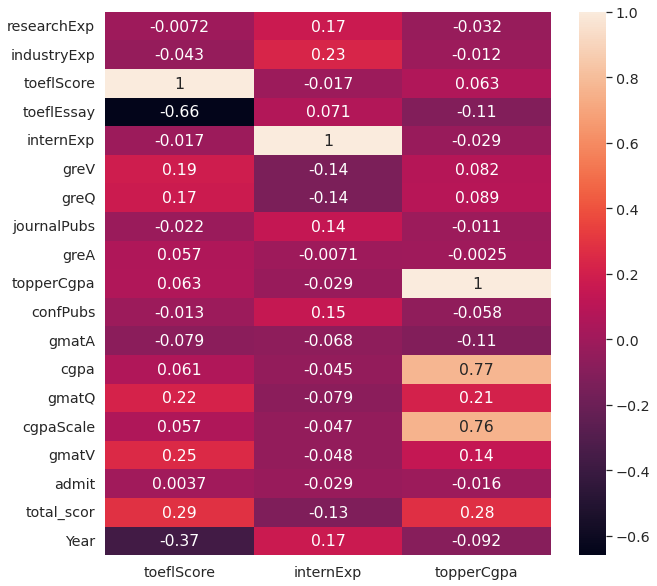

In [38]:
sns.heatmap(df.corr()[['toeflScore','internExp','topperCgpa']],annot=True)

<AxesSubplot:>

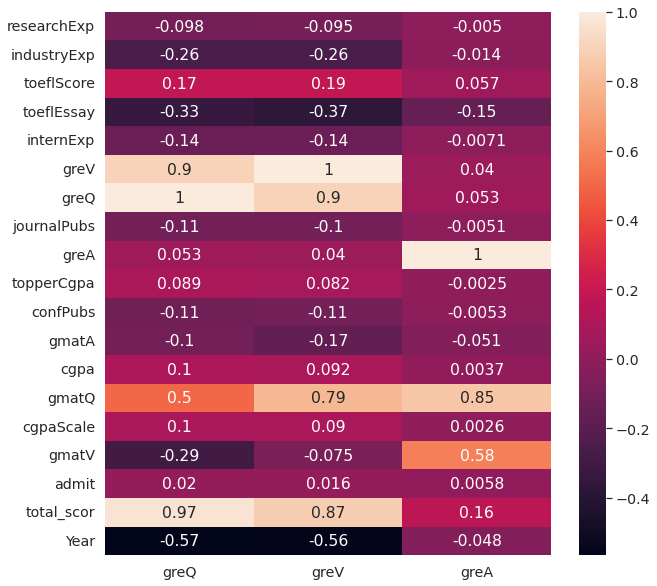

In [39]:
sns.heatmap(df.corr()[['greQ','greV','greA']],annot=True)

In [40]:
df.corr()

,researchExp,industryExp,toeflScore,toeflEssay,internExp,greV,greQ,journalPubs,greA,topperCgpa,confPubs,gmatA,cgpa,gmatQ,cgpaScale,gmatV,admit,total_scor,Year
researchExp,1.000000,0.139083,-0.007198,0.057477,0.166862,-0.094564,-0.097849,0.196405,-0.004952,-0.031997,0.360573,NaN,-0.049552,NaN,-0.054279,NaN,-0.018891,-0.090904,0.125267
industryExp,0.139083,1.000000,-0.043148,0.106804,0.228928,-0.257011,-0.260453,0.111468,-0.013812,-0.012060,0.117667,-0.203409,-0.018367,-0.020273,-0.016672,-0.298075,-0.049984,-0.221981,0.326159
toeflScore,-0.007198,-0.043148,1.000000,-0.659536,-0.017102,0.185897,0.174967,-0.021508,0.057437,0.062655,-0.013109,-0.079406,0.061496,0.218095,0.057118,0.250835,0.003737,0.286492,-0.370558
toeflEssay,0.057477,0.106804,-0.659536,1.000000,0.071013,-0.373771,-0.334037,0.058433,-0.154476,-0.114456,0.054873,0.342343,-0.142553,-0.130197,-0.145273,-0.081677,-0.001264,-0.441339,0.482983
internExp,0.166862,0.228928,-0.017102,0.071013,1.000000,-0.136262,-0.138619,0.143453,-0.007108,-0.029360,0.150386,-0.068408,-0.045368,-0.078566,-0.046752,-0.048020,-0.028716,-0.126067,0.166787
greV,-0.094564,-0.257011,0.185897,-0.373771,-0.136262,1.000000,0.901415,-0.102960,0.039608,0.081945,-0.107294,-0.166800,0.092415,0.785932,0.089955,-0.075167,0.015710,0.874219,-0.556328
greQ,-0.097849,-0.260453,0.174967,-0.334037,-0.138619,0.901415,1.000000,-0.105105,0.052957,0.088890,-0.108866,-0.101607,0.102446,0.498466,0.100158,-0.291736,0.020214,0.968246,-0.566515
journalPubs,0.196405,0.111468,-0.021508,0.058433,0.143453,-0.102960,-0.105105,1.000000,-0.005068,-0.011414,0.297187,-0.039013,-0.022416,-0.087925,-0.021964,-0.090515,-0.022691,-0.098885,0.119784
greA,-0.004952,-0.013812,0.057437,-0.154476,-0.007108,0.039608,0.052957,-0.005068,1.000000,-0.002531,-0.005346,-0.051182,0.003727,0.846506,0.002571,0.578599,0.005847,0.164538,-0.048461
topperCgpa,-0.031997,-0.012060,0.062655,-0.114456,-0.029360,0.081945,0.088890,-0.011414,-0.002531,1.000000,-0.058143,-0.109300,0.767438,0.210823,0.756571,0.143044,-0.016366,0.276392,-0.091890


In [41]:
new_df=pd.pivot_table(data=df, values ='cgpa',columns ='univName',index ='admit')
new_df

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,42.936656,33.865433,35.278157,45.283086,34.934851,38.333000,47.968906,35.203461,22.565882,38.826711,...,40.010202,41.616603,30.813686,48.514829,42.445190,33.694637,32.756918,37.430346,45.933333,48.182941
1,35.931680,12.433333,35.878922,39.373705,31.586471,29.242841,49.655139,35.549328,26.044286,37.281510,...,40.265498,43.852087,19.422259,42.376739,41.065572,35.291508,21.417461,25.489954,37.110818,43.582427


In [42]:
new_df2=pd.pivot_table(data=df, values ='researchExp',columns ='univName',index ='admit')
new_df2

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,0.351044,0.466667,0.342697,0.232759,0.364865,0.479167,0.37500,0.58554,0.176471,0.052632,...,0.292196,0.129771,0.599558,0.311137,0.703333,0.55157,0.599702,0.329897,0.00000,0.431373
1,0.484920,0.000000,0.430524,0.320186,0.308370,0.147287,0.17027,0.29590,0.000000,0.369369,...,0.338538,0.083721,0.771605,0.194390,0.717042,0.77381,0.348214,0.782178,0.72327,0.000000


In [43]:

for new_df3 in [ 'industryExp','toeflScore','internExp','greQ','greA','topperCgpa','cgpa','cgpaScale']:
    print(f'-------{new_df3}-------')
    print(pd.pivot_table(data=df, values =[new_df3],columns ='univName',index ='admit'))
    print('________________________'*3)

-------industryExp-------
                      industryExp                                     \
univName Arizona State University California Institute of Technology   
admit                                                                  
0                        5.377609                           4.966667   
1                        3.860038                           0.000000   

                                                                            \
univName Carnegie Mellon University Clemson University Columbia University   
admit                                                                        
0                          4.039326           2.954023            4.247748   
1                          2.894077           3.429234            2.259912   

                                                     \
univName Cornell University George Mason University   
admit                                                 
0                  5.330357                5.812500   
1 

In [44]:
[ 'researchExp','industryExp','toeflScore','internExp','greV','greQ','greA','topperCgpa','gmatA','cgpa','gmatQ','cgpaScale','','']

['researchExp',
 'industryExp',
 'toeflScore',
 'internExp',
 'greV',
 'greQ',
 'greA',
 'topperCgpa',
 'gmatA',
 'cgpa',
 'gmatQ',
 'cgpaScale',
 '',
 '']

In [45]:
new_df2=pd.pivot_table(data=df, values ='toeflScore',columns ='univName',index ='admit')
new_df2

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,105.80805,104.565217,108.317814,99.235849,110.859903,110.664577,98.416667,109.436790,134.6,118.492958,...,104.196154,100.866071,114.907583,103.299124,113.512281,108.080952,109.353600,114.037736,102.400000,101.12766
1,109.75903,98.857143,111.237736,107.069409,118.136585,112.928571,104.646884,114.433852,114.0,122.670330,...,113.888717,102.464334,112.198582,103.917976,111.341549,110.855814,108.323671,119.859206,104.831933,103.50000


In [46]:
new_df2=pd.pivot_table(data=df, values ='internExp',columns ='univName',index ='admit')
new_df2

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,0.518027,0.4,0.460674,0.347701,0.581081,0.812500,0.250000,0.699140,0.0,0.407895,...,0.505455,0.343511,0.652655,0.468427,0.746667,0.457399,0.725782,0.530191,1.166667,1.156863
1,0.394625,0.0,0.298405,0.368910,0.202643,0.387597,0.097297,0.365419,0.0,0.207207,...,0.519517,0.281395,0.364198,0.259684,0.485531,0.551587,0.419643,0.656766,0.389937,0.233010


In [47]:
new_df2=pd.pivot_table(data=df, values ='greV',columns ='univName',index ='admit')
new_df2

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,257.163305,364.000000,329.104962,256.921053,386.856481,357.249249,251.671875,334.268116,393.470588,388.986842,...,301.115596,250.567050,374.442697,266.050926,327.463087,295.953704,343.160420,377.440476,262.652174,258.40000
1,306.928468,198.071429,342.600240,326.365796,420.986425,375.548117,339.024862,410.968921,251.250000,402.971963,...,335.747261,276.206854,368.967532,291.764778,301.678689,269.886555,333.004695,362.286689,222.469799,296.14433


In [48]:
new_df2=pd.pivot_table(data=df, values ='greQ',columns ='univName',index ='admit')
new_df2

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,329.546590,464.241379,421.452290,362.384840,493.685185,448.120120,363.046875,425.242578,492.235294,518.144737,...,393.223443,356.704981,477.088764,348.379630,427.916107,368.773148,434.604198,483.043091,343.869565,377.32000
1,402.894737,290.714286,428.077844,435.855107,533.380090,472.564854,500.030220,513.870438,321.250000,501.841121,...,442.088321,385.079462,455.006452,399.733225,383.445902,327.647059,411.826291,477.593857,272.953020,420.55102


In [49]:
new_df2=pd.pivot_table(data=df, values ='greA',columns ='univName',index ='admit')
new_df2

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,3.44077,3.892857,3.766075,6.027941,3.739336,3.804688,3.246032,4.814312,92.766667,3.657143,...,3.556415,3.232794,8.222706,4.220096,5.849315,3.652174,6.986068,4.709714,3.295455,19.265306
1,5.37902,3.769231,6.821679,7.917488,7.608796,4.021739,7.819885,9.268901,4.250000,3.924752,...,4.149358,5.095466,10.483219,4.977367,3.690476,9.270474,5.478365,3.830357,3.163194,9.771277


In [50]:
new_df2=pd.pivot_table(data=df, values ='cgpaScale',columns ='univName',index ='admit')
new_df2

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,61.875712,45.266667,49.855805,66.149425,49.711712,52.994048,72.812500,48.241947,34.705882,54.394737,...,60.098004,64.977099,41.264381,72.669346,60.046667,47.327354,43.544643,51.078056,77.500000,78.039216
1,48.608860,24.458333,49.908884,56.199536,43.004405,38.441860,74.810811,48.094474,34.285714,54.774775,...,53.830376,64.018605,24.925926,58.684710,56.501608,51.634921,27.156250,34.547855,55.899371,66.194175


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userName         53644 non-null  object 
 1   major            53257 non-null  object 
 2   researchExp      53644 non-null  int64  
 3   industryExp      53644 non-null  int64  
 4   specialization   31949 non-null  object 
 5   toeflScore       49230 non-null  float64
 6   program          53322 non-null  object 
 7   department       53643 non-null  object 
 8   toeflEssay       11863 non-null  float64
 9   internExp        53630 non-null  float64
 10  greV             52388 non-null  float64
 11  greQ             52424 non-null  float64
 12  userProfileLink  53644 non-null  object 
 13  journalPubs      53308 non-null  float64
 14  greA             50786 non-null  float64
 15  topperCgpa       53641 non-null  float64
 16  termAndYear      53322 non-null  object 
 17  confPubs    

In [52]:
df['termAndYear'].value_counts()

Fall - 2013       10373
Fall - 2011       10089
Fall - 2012       10034
Fall - 2014        9038
Fall - 2015        6375
Fall               1090
Fall - 2006         806
Spring - 2014       792
Spring - 2013       752
Spring - 2012       730
Spring - 2015       566
Fall - 2010         559
Fall - 2007         472
Spring - 2011       382
Spring - 2016       341
Fall - 2008         248
Fall - 2009         211
Fall - 2016         130
Spring               28
Spring - 2008        27
Summer - 2013        23
Fall - 14            22
Fall - 13            21
Spring - 2010        21
Spring - 2007        17
Fall - 2             17
Spring - 2009        16
Fall - 2005          15
Summer - 2015        15
Summer - 2014        14
Fall - 11            11
Fall - 12             9
Summer - 2012         9
Fall - 15             9
0                     7
Summer - 2016         7
Fall - 6              6
Fall - 2103           5
Summer - 2011         5
8.89                  4
Fall - 215            3
Summer          

In [53]:
df['season'].value_counts()

Fall       48467
Spring      3647
Fall        1090
Summer        73
Spring        28
0              7
8.89           4
Summer         3
81             3
Name: season, dtype: int64

In [54]:
new_df2=pd.pivot_table(data=df, values ='total_scor',columns ='univName',index ='admit')
new_df2

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
admit,,,,,,,,,,,,,,,,,,,,,
0,534.398502,678.237545,617.640470,565.058309,690.248990,641.530893,561.499322,616.640225,847.884615,739.123030,...,588.745606,587.146441,667.996072,562.658080,642.026893,548.646586,624.464307,683.795081,550.815789,591.671087
1,601.789807,383.844286,624.948756,648.894332,728.632543,664.476542,729.437752,714.064368,602.596667,761.679405,...,647.454662,595.150065,618.791757,601.612038,593.293284,532.991592,575.702256,649.429242,482.366667,612.110787


In [55]:

df.groupby("admit").describe()['total_scor'].transpose()

admit,0,1
count,23345.000000,24357.000000
mean,617.846208,630.893746
std,344.166868,345.536681
min,78.100000,75.100000
25%,312.550000,307.700000
50%,435.500000,441.920000
75%,932.800000,936.420000
max,8455.600000,8455.600000


In [56]:
df[df['total_scor']==df['total_scor'].max()]

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
348,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,Virginia Polytechnic Institute and State Unive...,1,8455.6,Fall,2006
6907,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,University of Texas Austin,0,8455.6,Fall,2006
12919,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,University of Minnesota Twin Cities,1,8455.6,Fall,2006
14439,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,University of Michigan Ann Arbor,0,8455.6,Fall,2006
16976,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,University of Illinois Urbana-Champaign,0,8455.6,Fall,2006
28524,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,Texas A and M University College Station,0,8455.6,Fall,2006
35951,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,Purdue University,1,8455.6,Fall,2006
45440,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,Georgia Institute of Technology,0,8455.6,Fall,2006
50593,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,Arizona State University,1,8455.6,Fall,2006


In [57]:
df[(df['admit']==1)&df['season']].mode()[0:1:1]

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
0,disissid,Computer Science,0.0,0.0,VLSI,110.0,MS,Computer Science,29.0,0.0,...,5.0,0.0,49.0,100.0,27.0,University of Texas Dallas,1.0,424.5,Fall,2012.0


In [58]:
df['univName'].value_counts()

North Carolina State University                        3413
University of Texas Dallas                             3402
Arizona State University                               3176
SUNY Buffalo                                           2329
University of Florida                                  2318
Texas A and M University College Station               2181
Northeastern University                                2019
University of Southern California                      1960
Georgia Institute of Technology                        1958
University of Illinois Chicago                         1912
SUNY Stony Brook                                       1541
Carnegie Mellon University                             1412
Syracuse University                                    1347
University of Minnesota Twin Cities                    1245
University of Texas Arlington                          1122
University of Cincinnati                               1120
University of North Carolina Charlotte  

In [59]:
df[(df['admit']==1)]['univName'].value_counts()

University of Texas Dallas                             2531
Arizona State University                               2122
SUNY Buffalo                                           1547
North Carolina State University                        1504
University of Southern California                      1409
Northeastern University                                1332
University of Illinois Chicago                         1280
University of Florida                                  1125
Carnegie Mellon University                              878
Syracuse University                                     867
University of Texas Arlington                           860
University of North Carolina Charlotte                  800
University of Cincinnati                                798
Texas A and M University College Station                790
University of Arizona                                   672
SUNY Stony Brook                                        672
University of Maryland College Park     

In [60]:
df[(df['admit']==1)&df['major']].mode()[0:1:1]

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
0,disissid,Computer Science,0.0,0.0,VLSI,110.0,MS,Computer Science,29.0,0.0,...,5.0,0.0,49.0,100.0,27.0,University of Texas Dallas,1.0,424.5,Fall,2012.0


In [61]:
df[(df['admit']==1)]['major'].value_counts()

Computer Science                  9348
MIS                               3448
Electrical Engineering            3145
Electronics and Communication     1627
Mechanical Engineering            1351
                                  ... 
Ocean Engineering                    1
Forensic Science                     1
Health Rehabilitation Sciences       1
Mechatronics/Robotics                1
ASTRONOMY / ASTROPHYSICS             1
Name: major, Length: 235, dtype: int64

In [62]:
df[(df['admit']==1)]['department'].value_counts()

Computer Science                        2536
ECE                                     2244
Information Technology                  1498
0                                       1408
CSE                                     1403
                                        ... 
Materials Science                          1
Electronics & Computer Engg                1
Automotive Engg                            1
Biomedical Engg.                           1
Metallurgy and Materials Engineering       1
Name: department, Length: 1362, dtype: int64

In [63]:
df[(df['admit']==1)]['program'].value_counts()

MS                 26607
PhD                  467
MS/PhD               445
Both MS and PhD      215
Name: program, dtype: int64

In [64]:
df[(df['admit']==0)]['major'].value_counts()

Computer Science                   10925
Electrical Engineering              3142
Electronics and Communication       1597
Computer Engineering                1458
Mechanical Engineering              1455
                                   ...  
Polymer Science and Engineering        1
Entertainment Studies                  1
Veterinary & Animal Science            1
Kinesiology                            1
Project Management                     1
Name: major, Length: 197, dtype: int64

In [65]:
df[(df['admit']==0)]['department'].value_counts()

Computer Science                                      2467
ECE                                                   1987
Information Technology                                1417
CSE                                                   1195
Computer Engineering                                  1134
                                                      ... 
Mechanical 2006-10                                       1
AIB                                                      1
BE(Electronics and Comm))                                1
Information & Communication Technology                   1
University Institute of Engineering and Technology       1
Name: department, Length: 1107, dtype: int64

In [66]:
df[(df['admit']==0)]['program'].value_counts()

MS                 24342
MS/PhD               517
PhD                  507
Both MS and PhD      222
Name: program, dtype: int64

In [67]:
df[(df['admit']==1)&df['userName']].mode()[:2:1]

,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
0,disissid,Computer Science,0.0,0.0,VLSI,110.0,MS,Computer Science,29.0,0.0,...,5.0,0.0,49.0,100.0,27.0,University of Texas Dallas,1.0,424.5,Fall,2012.0
1,pralaybiswas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [68]:
df[(df['admit']==1)]['userName'].value_counts()

disissid               12
pralaybiswas           12
Ancalagon The Black    10
ManU_                  10
vickybogs              10
                       ..
vikasmb                 1
vgkh                    1
ventat.rao              1
vamsikrishna_236        1
zenga                   1
Name: userName, Length: 13164, dtype: int64

In [69]:
df[df['total_scor']==df['total_scor'].max()][:1:1][(df['admit']==1)&df['userName']].mode()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
0,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,Virginia Polytechnic Institute and State Unive...,1,8455.6,Fall,2006


In [70]:
df[df['total_scor']==df['total_scor'].max()][:1:1][(df['admit']==1)]

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


,userName,major,researchExp,industryExp,specialization,toeflScore,program,department,toeflEssay,internExp,...,gmatA,cgpa,gmatQ,cgpaScale,gmatV,univName,admit,total_scor,season,Year
348,aks1232001,Industrial Engineering,0,0,Operations Research (SCM and Optimization),297.0,Both MS and PhD,Mechanical Engg,6.0,0.0,...,NaN,79.6,NaN,100,NaN,Virginia Polytechnic Institute and State Unive...,1,8455.6,Fall,2006


In [71]:
df.groupby("univName").describe()['total_scor'].transpose()

univName,Arizona State University,California Institute of Technology,Carnegie Mellon University,Clemson University,Columbia University,Cornell University,George Mason University,Georgia Institute of Technology,Harvard University,Johns Hopkins University,...,University of Southern California,University of Texas Arlington,University of Texas Austin,University of Texas Dallas,University of Utah,University of Washington,University of Wisconsin Madison,Virginia Polytechnic Institute and State University,Wayne State University,Worcester Polytechnic Institute
count,2837.000000,29.000000,1234.000000,687.000000,400.000000,524.000000,383.000000,1799.000000,16.000000,154.000000,...,1765.000000,935.000000,958.000000,2975.000000,556.000000,404.000000,815.000000,898.000000,136.000000,135.000000
mean,579.341875,607.177103,622.105987,610.942362,709.344807,650.989405,703.567341,643.988303,801.893125,752.012387,...,630.656887,593.326780,661.010908,591.490556,617.923040,540.664089,612.318668,673.500637,491.929412,605.146148
std,352.759724,338.610216,336.177393,325.266779,345.190706,322.772670,319.792938,380.189058,517.705287,334.361805,...,324.768665,308.699849,427.674393,316.578750,328.602332,312.060085,330.741372,423.636775,291.438290,362.079420
min,163.000000,217.110000,153.500000,181.950000,156.640000,270.400000,215.500000,174.270000,281.600000,272.500000,...,189.400000,120.210000,237.100000,75.100000,175.210000,155.300000,181.950000,181.950000,211.800000,146.500000
25%,298.680000,297.500000,302.982500,318.950000,318.632500,311.480000,402.750000,306.450000,401.555000,338.042500,...,311.490000,322.280000,304.400000,314.980000,310.012500,301.007500,302.485000,310.075000,286.605000,321.375000
50%,424.300000,434.100000,438.780000,428.300000,902.980000,469.500000,849.500000,448.500000,875.105000,918.600000,...,446.070000,423.000000,484.120000,425.000000,437.000000,410.210000,441.000000,816.255000,394.000000,412.000000
75%,918.380000,932.210000,936.575000,928.035000,976.065000,936.647500,976.750000,937.510000,972.377500,1031.125000,...,936.500000,915.470000,934.935000,919.450000,938.310000,904.987500,929.075000,938.992500,738.000000,940.250000
max,8455.600000,1075.000000,2412.000000,2373.000000,2451.260000,1263.000000,2089.000000,8455.600000,2240.100000,1273.200000,...,2061.000000,1934.000000,8455.600000,2412.000000,1914.380000,2352.400000,2451.260000,8455.600000,1904.000000,2373.000000


In [72]:
df['journalPubs'].unique()

array([ 0., nan,  2.,  7.,  1.,  3.,  4.,  5., 12.,  6., 10.])

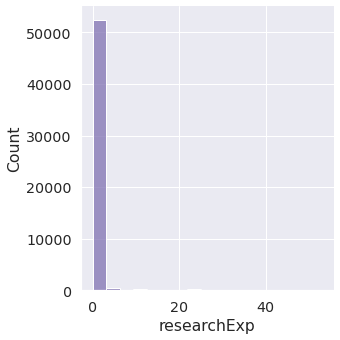

In [73]:
sns.displot(df['researchExp'],kde=False,color='m')

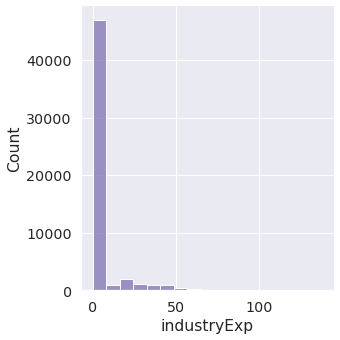

In [74]:
sns.displot(df['industryExp'],kde=False,color='m')

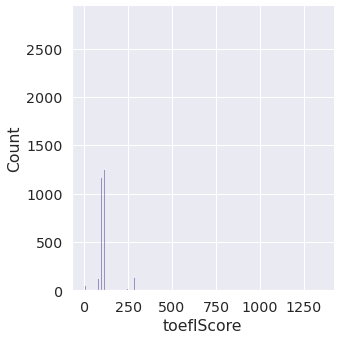

In [75]:
sns.displot(df['toeflScore'],kde=False,color='m')

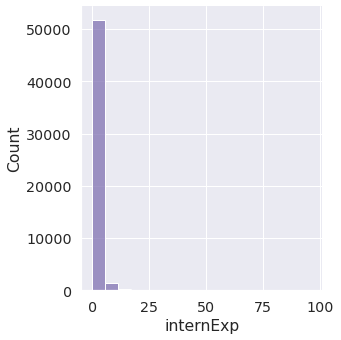

In [76]:
sns.displot(df['internExp'],kde=False,color='m')

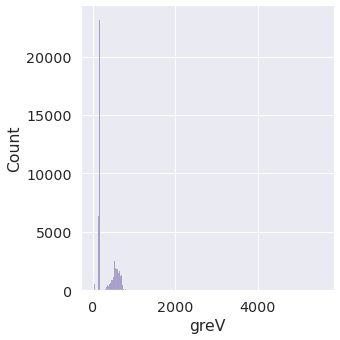

In [77]:
sns.displot(df['greV'],kde=False,color='m')

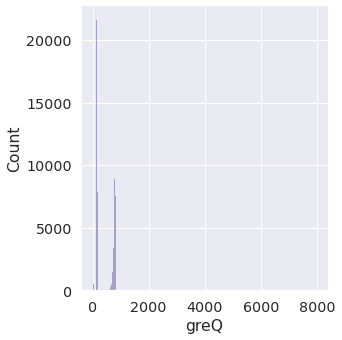

In [78]:
sns.displot(df['greQ'],kde=False,color='m')

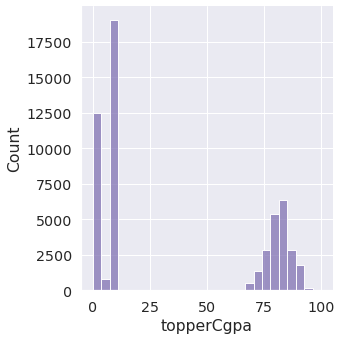

In [79]:
sns.displot(df['topperCgpa'],kde=False,color='m')

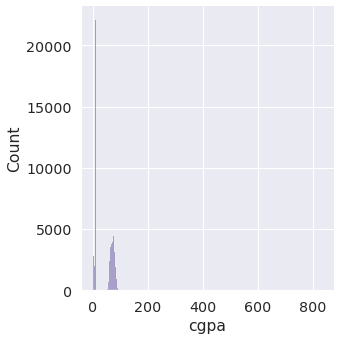

In [80]:
sns.displot(df['cgpa'],kde=False,color='m')

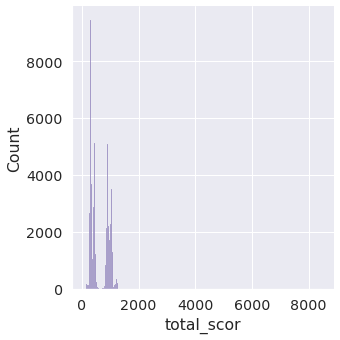

In [81]:
sns.displot(df['total_scor'],kde=False,color='m')

In [82]:
df.columns

Index(['userName', 'major', 'researchExp', 'industryExp', 'specialization',
       'toeflScore', 'program', 'department', 'toeflEssay', 'internExp',
       'greV', 'greQ', 'userProfileLink', 'journalPubs', 'greA', 'topperCgpa',
       'termAndYear', 'confPubs', 'ugCollege', 'gmatA', 'cgpa', 'gmatQ',
       'cgpaScale', 'gmatV', 'univName', 'admit', 'total_scor', 'season',
       'Year'],
      dtype='object')

<AxesSubplot:xlabel='total_scor', ylabel='confPubs'>

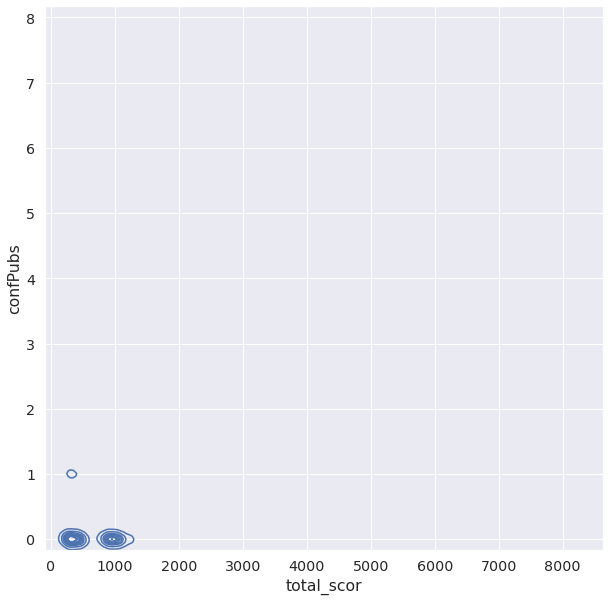

In [83]:
sns.kdeplot(y='confPubs',x='total_scor',data=df)

<AxesSubplot:xlabel='Year', ylabel='confPubs'>

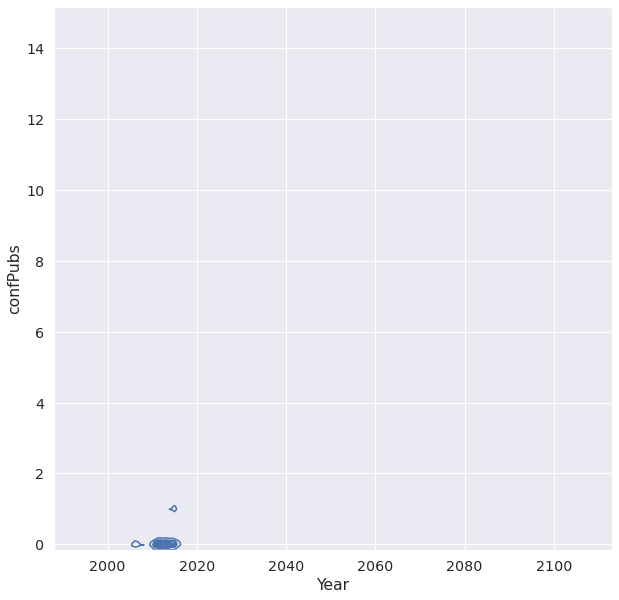

In [84]:
sns.kdeplot(y='confPubs',x='Year',data=df)

<AxesSubplot:xlabel='admit', ylabel='Year'>

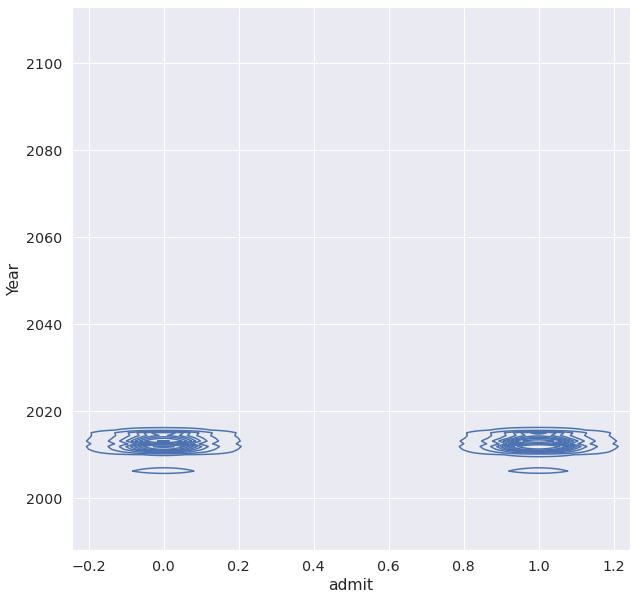

In [85]:
sns.kdeplot(x='admit',y='Year',data=df)

<AxesSubplot:xlabel='cgpa', ylabel='admit'>

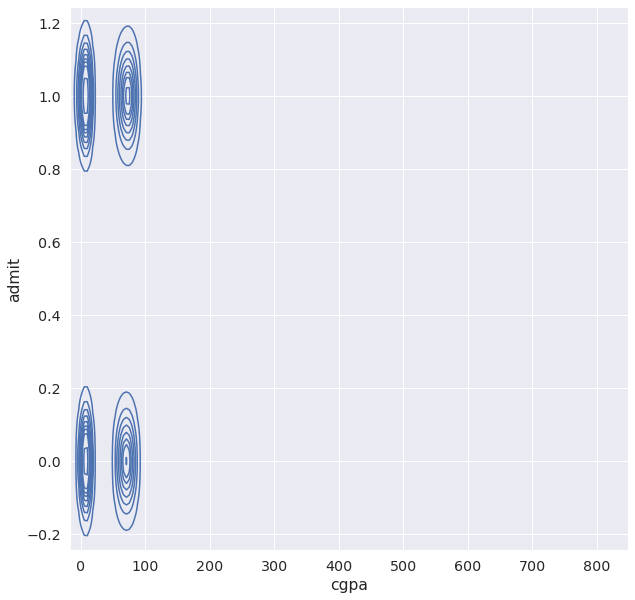

In [86]:
sns.kdeplot(y='admit',x='cgpa',data=df)

<AxesSubplot:xlabel='admit', ylabel='Year'>

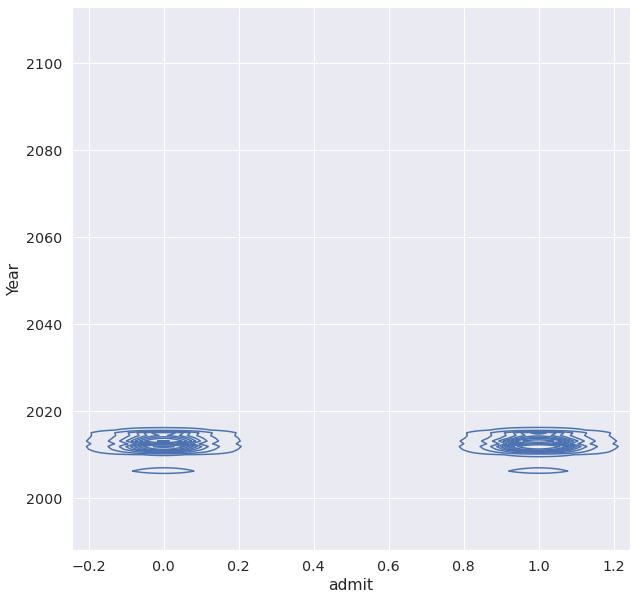

In [87]:
sns.kdeplot(x='admit',y='Year',data=df)

<AxesSubplot:xlabel='confPubs', ylabel='topperCgpa'>

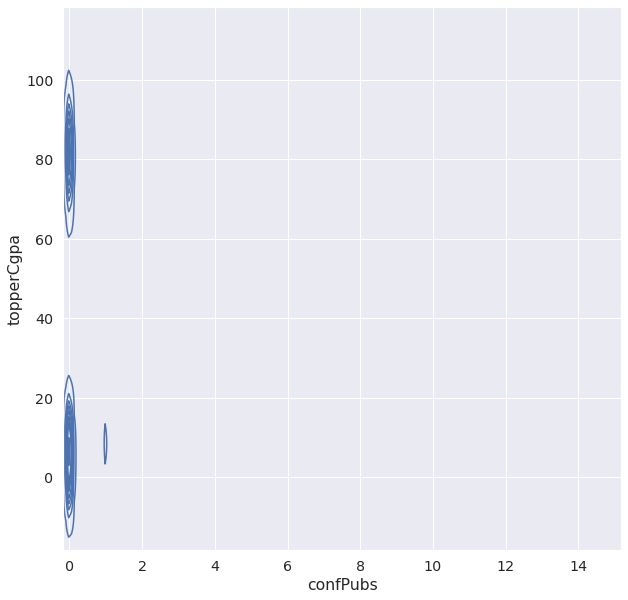

In [88]:
sns.kdeplot(x='confPubs',y='topperCgpa',data=df)

In [89]:
df.columns

Index(['userName', 'major', 'researchExp', 'industryExp', 'specialization',
       'toeflScore', 'program', 'department', 'toeflEssay', 'internExp',
       'greV', 'greQ', 'userProfileLink', 'journalPubs', 'greA', 'topperCgpa',
       'termAndYear', 'confPubs', 'ugCollege', 'gmatA', 'cgpa', 'gmatQ',
       'cgpaScale', 'gmatV', 'univName', 'admit', 'total_scor', 'season',
       'Year'],
      dtype='object')

<AxesSubplot:xlabel='journalPubs', ylabel='univName'>

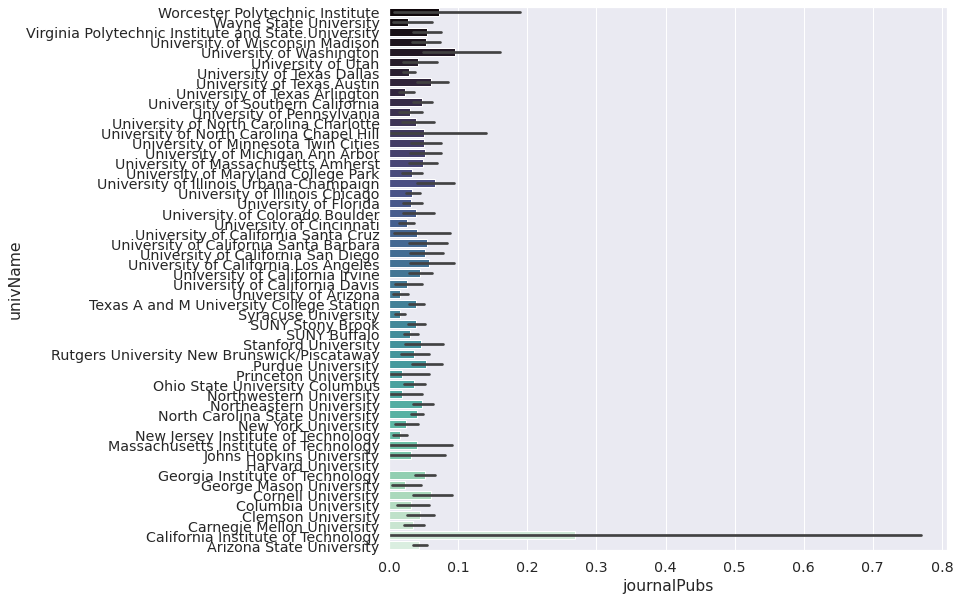

In [90]:
sns.barplot(x='journalPubs',y='univName',data=df,palette='mako')

<AxesSubplot:xlabel='cgpa', ylabel='univName'>

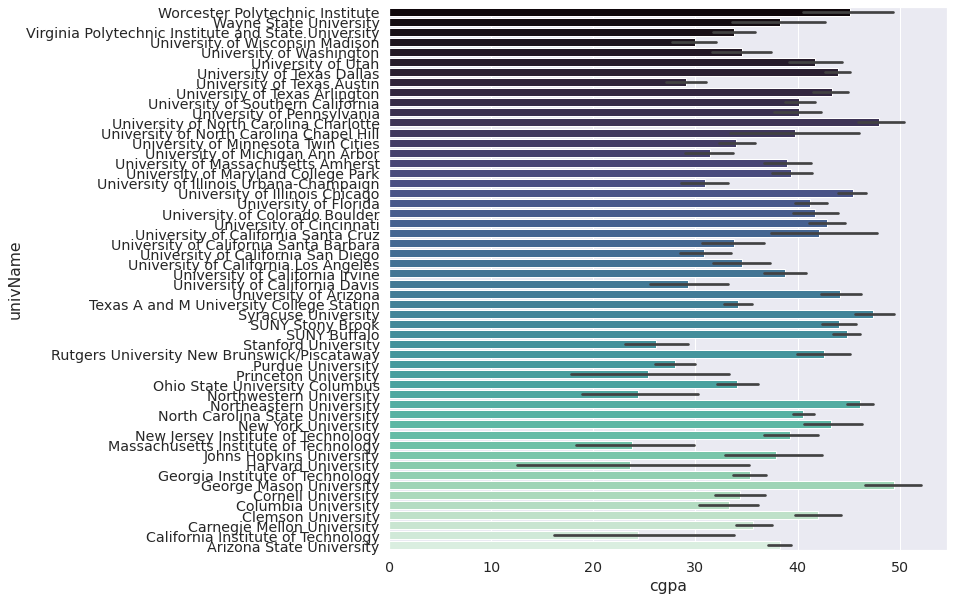

In [91]:
sns.barplot(x='cgpa',y='univName',data=df,palette='mako')

<AxesSubplot:xlabel='cgpaScale', ylabel='univName'>

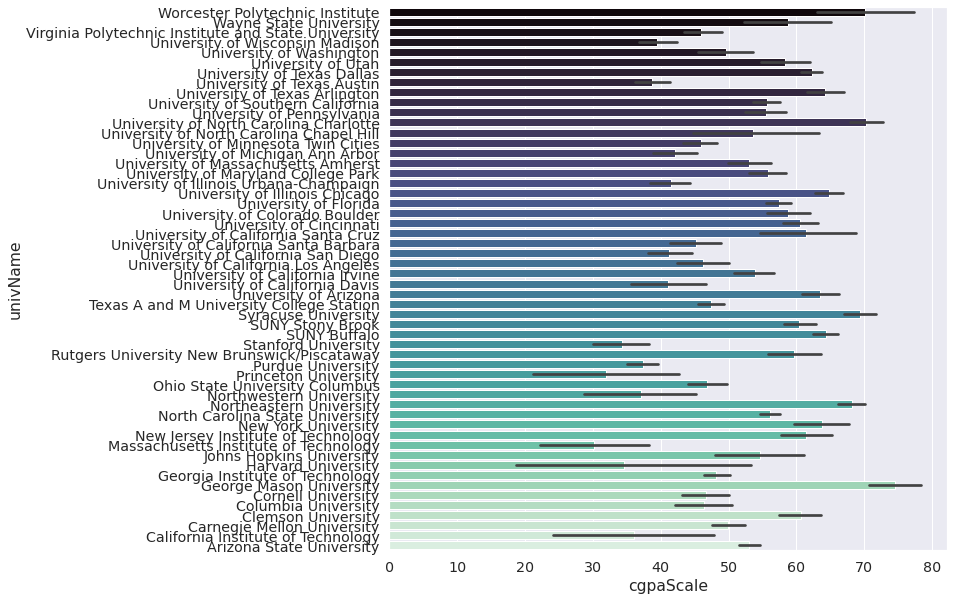

In [92]:
sns.barplot(x='cgpaScale',y='univName',data=df,palette='mako')

<AxesSubplot:xlabel='topperCgpa', ylabel='univName'>

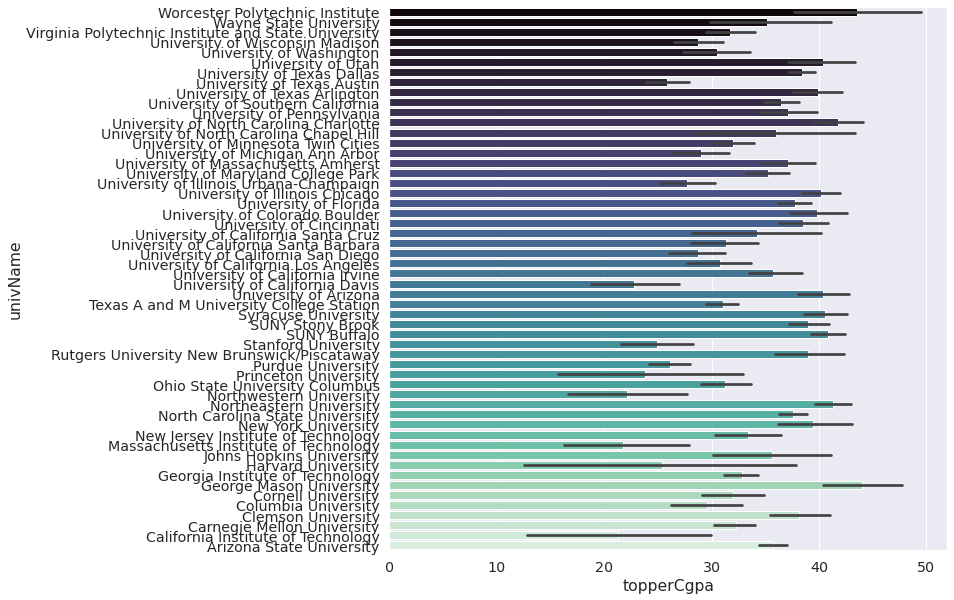

In [93]:
sns.barplot(x='topperCgpa',y='univName',data=df,palette='mako')

<AxesSubplot:xlabel='confPubs', ylabel='univName'>

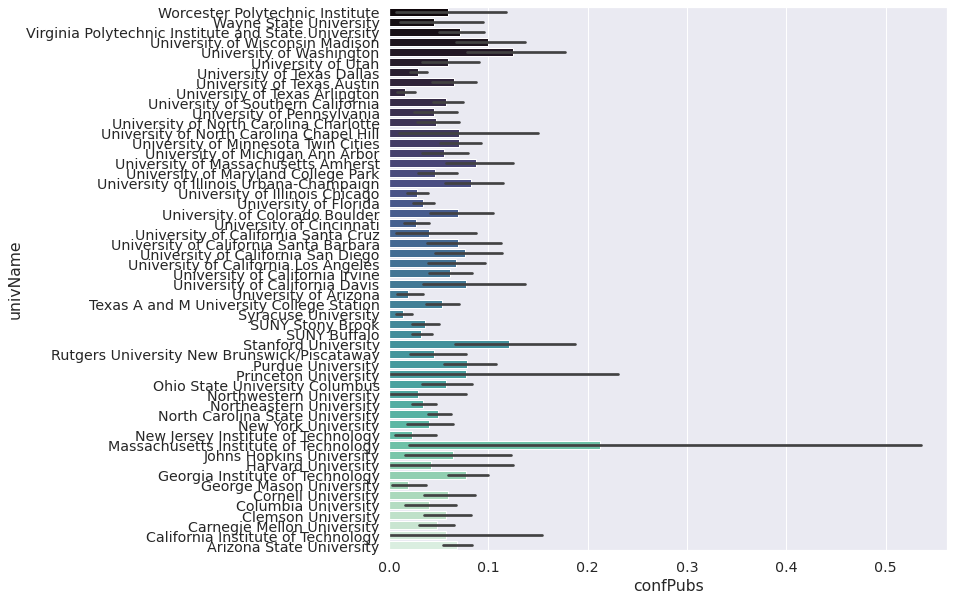

In [94]:
sns.barplot(x='confPubs',y='univName',data=df,palette='mako')

<AxesSubplot:xlabel='admit', ylabel='univName'>

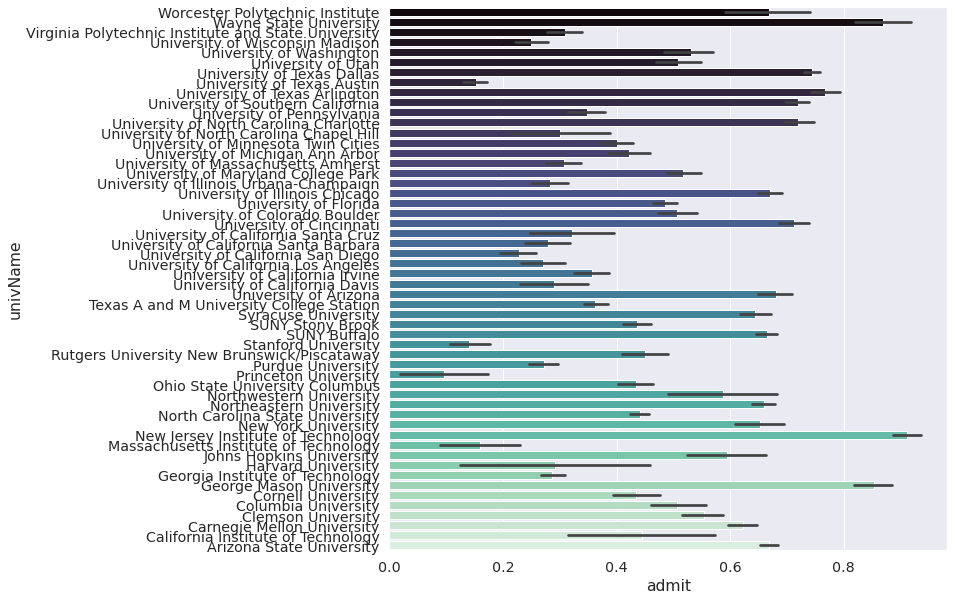

In [95]:
sns.barplot(x='admit',y='univName',data=df,palette='mako')

<AxesSubplot:xlabel='total_scor', ylabel='univName'>

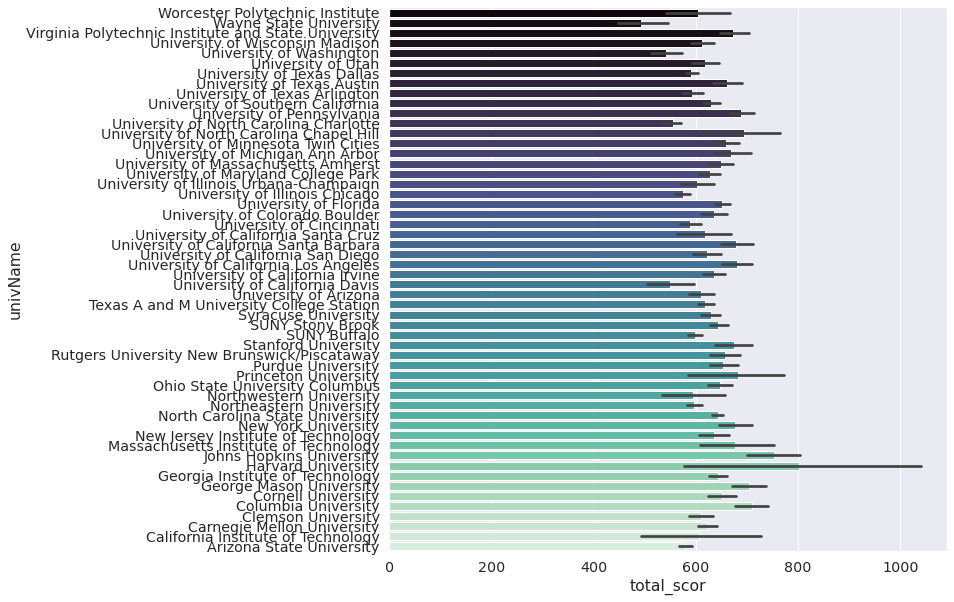

In [96]:
sns.barplot(x='total_scor',y='univName',data=df,palette='mako')

<AxesSubplot:xlabel='season', ylabel='cgpa'>

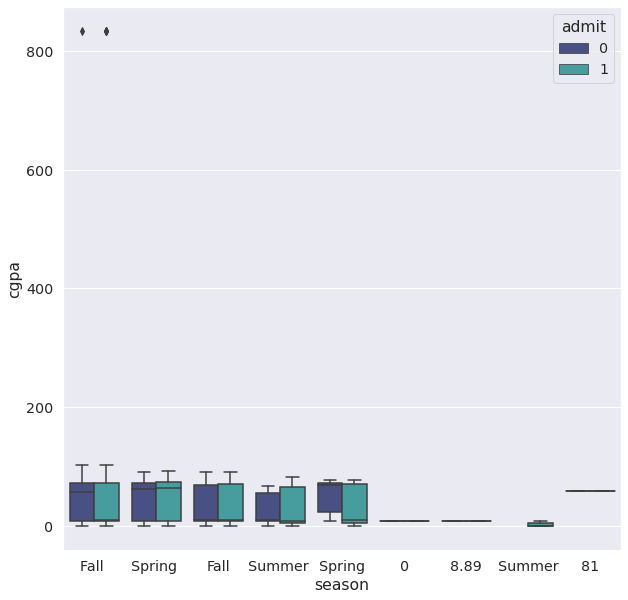

In [97]:
sns.boxplot(y='cgpa',x='season',data=df,hue='admit',palette='mako')

<AxesSubplot:xlabel='program', ylabel='cgpa'>

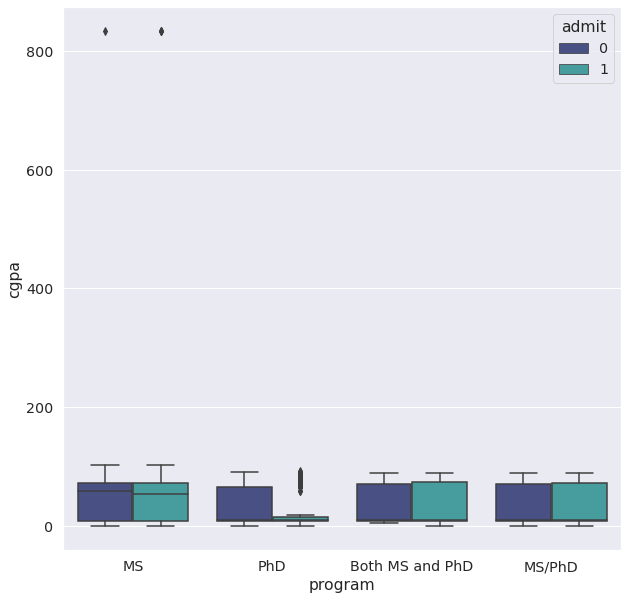

In [98]:
sns.boxplot(x='program',y='cgpa',data=df,hue='admit',palette='mako')

<AxesSubplot:xlabel='Year', ylabel='program'>

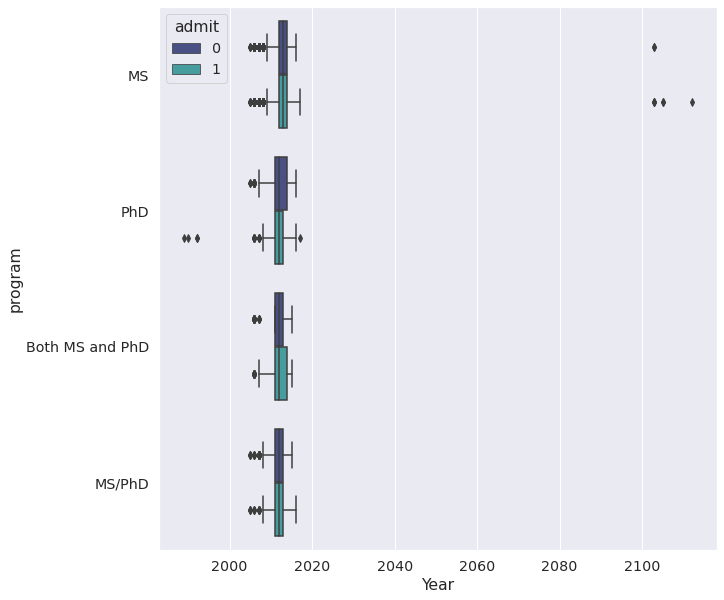

In [99]:
sns.boxplot(y='program',x='Year',data=df,hue='admit',palette='mako')

<AxesSubplot:xlabel='program', ylabel='confPubs'>

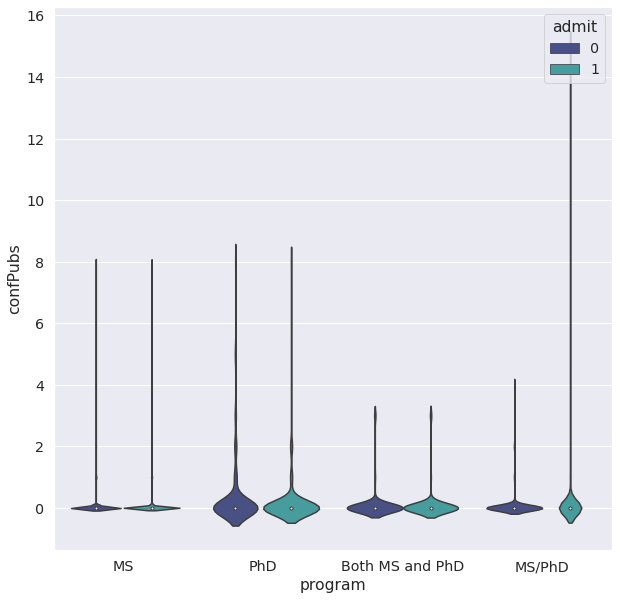

In [100]:
sns.violinplot(y='confPubs',x='program',data=df,hue='admit',palette='mako')

<AxesSubplot:xlabel='confPubs', ylabel='Year'>

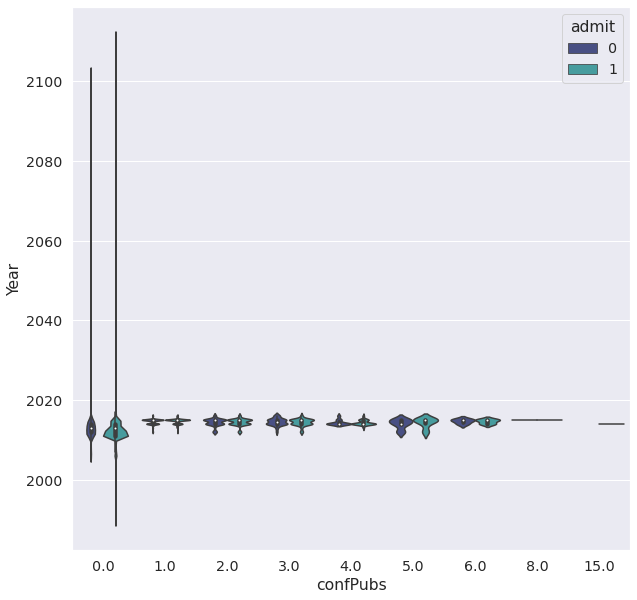

In [101]:
sns.violinplot(x='confPubs',y='Year',data=df,hue='admit',palette='mako')

<AxesSubplot:xlabel='program', ylabel='total_scor'>

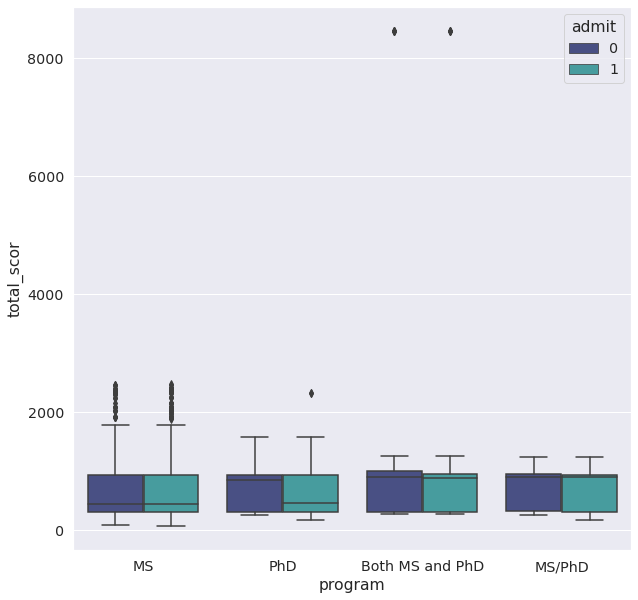

In [102]:
sns.boxplot(y='total_scor',x='program',data=df,hue='admit',palette='mako')

<AxesSubplot:xlabel='season', ylabel='total_scor'>

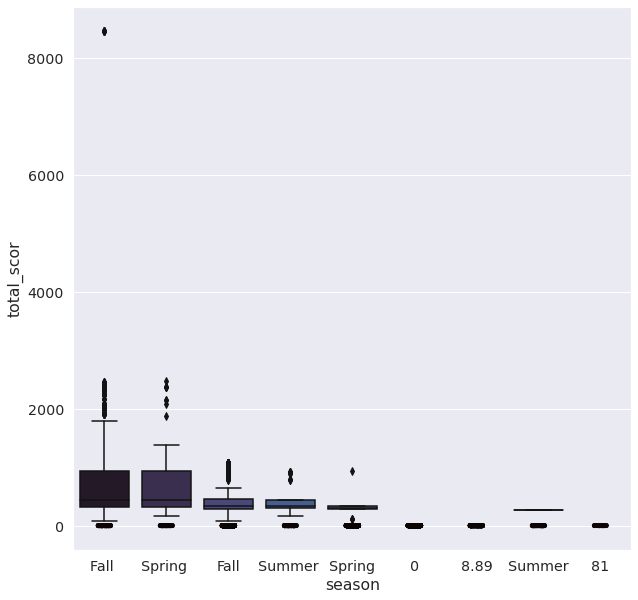

In [103]:
sns.stripplot(y='admit',x='ugCollege',data=df,palette='mako')
sns.boxplot(y='total_scor',x='season',data=df,palette='mako')

<AxesSubplot:xlabel='season', ylabel='Year'>

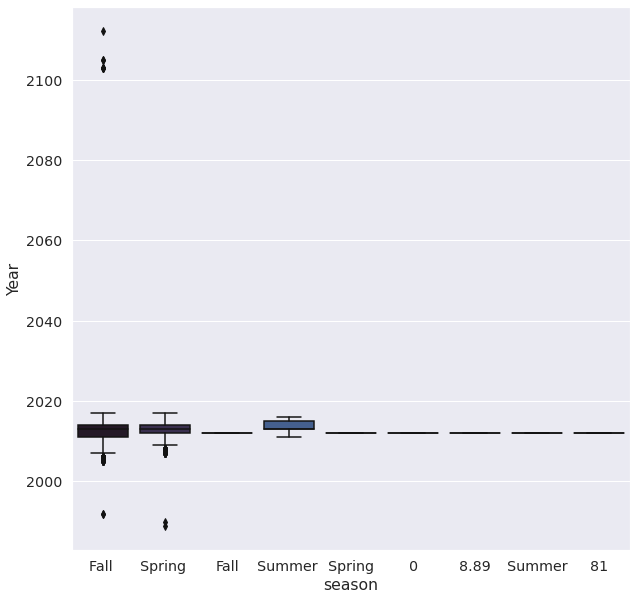

In [104]:
sns.boxplot(y='Year',x='season',data=df,palette='mako')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 29 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userName         53644 non-null  object 
 1   major            53257 non-null  object 
 2   researchExp      53644 non-null  int64  
 3   industryExp      53644 non-null  int64  
 4   specialization   31949 non-null  object 
 5   toeflScore       49230 non-null  float64
 6   program          53322 non-null  object 
 7   department       53643 non-null  object 
 8   toeflEssay       11863 non-null  float64
 9   internExp        53630 non-null  float64
 10  greV             52388 non-null  float64
 11  greQ             52424 non-null  float64
 12  userProfileLink  53644 non-null  object 
 13  journalPubs      53308 non-null  float64
 14  greA             50786 non-null  float64
 15  topperCgpa       53641 non-null  float64
 16  termAndYear      53322 non-null  object 
 17  confPubs    

In [106]:
df.isna().sum()/len(df)*100

userName            0.000000
major               0.721423
researchExp         0.000000
industryExp         0.000000
specialization     40.442547
toeflScore          8.228320
program             0.600254
department          0.001864
toeflEssay         77.885691
internExp           0.026098
greV                2.341362
greQ                2.274252
userProfileLink     0.000000
journalPubs         0.626352
greA                5.327716
topperCgpa          0.005592
termAndYear         0.600254
confPubs            0.626352
ugCollege           4.246514
gmatA              99.778167
cgpa                0.000000
gmatQ              99.770711
cgpaScale           0.000000
gmatV              99.787488
univName            0.000000
admit               0.000000
total_scor         11.076728
season              0.600254
Year                0.000000
dtype: float64

In [107]:
df.drop(['gmatA','gmatQ','gmatV','userProfileLink','termAndYear','cgpaScale','journalPubs','toeflEssay','specialization'], axis=1, inplace=True)
df.head(10)

,userName,major,researchExp,industryExp,toeflScore,program,department,internExp,greV,greQ,greA,topperCgpa,confPubs,ugCollege,cgpa,univName,admit,total_scor,season,Year
0,143saf,Systems and Control,0,18,112.0,MS,Instrumentation & Control,5.0,160.0,167.0,4.5,8.90,0.0,Dharamsinh Desai University,8.50,Worcester Polytechnic Institute,1,323.90,Fall,2015
1,7790ashish,Manufacturing Engineering,0,0,NaN,MS,0,0.0,NaN,NaN,NaN,0.00,0.0,NaN,0.00,Worcester Polytechnic Institute,1,NaN,Fall,2013
2,AB25,(MIS / MSIM / MSIS / MSIT),0,66,94.0,MS,Computer Engineering,0.0,146.0,157.0,3.0,81.00,0.0,IET DAVV,78.28,Worcester Polytechnic Institute,1,479.28,Fall,2015
3,abhijitg,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,NaN,0.00,NaN,NaN,0.00,Worcester Polytechnic Institute,1,NaN,NaN,2012
4,abhijitgang,MIS,0,0,81.0,MS,computer,0.0,420.0,770.0,2.5,70.00,0.0,Pune University,57.00,Worcester Polytechnic Institute,1,980.50,Fall,2011
5,abhishek001,MIS,0,0,273.0,MS,CE,0.0,410.0,1010.0,600.0,75.00,0.0,Thadomal Shahani Engineering College,52.00,Worcester Polytechnic Institute,1,2010.00,Fall,2006
6,agteakash,MIS,0,0,104.0,MS,Computer Engineering,0.0,150.0,161.0,4.5,77.81,0.0,University of Mumbai,62.20,Worcester Polytechnic Institute,1,409.51,Fall,2015
7,alankarMIS,MIS-management related courses,0,0,95.0,MS,IT,0.0,147.0,156.0,3.0,76.00,0.0,MU,52.00,Worcester Polytechnic Institute,1,382.00,Fall,2012
8,amandeepsharma89,MIS,0,0,101.0,MS,I.T,0.0,490.0,740.0,3.0,74.00,0.0,MU,64.00,Worcester Polytechnic Institute,1,982.00,Fall,2011
9,amatelia3,Computer Science,0,0,107.0,MS,Information Technology,0.0,550.0,780.0,4.5,0.00,0.0,K J Somaiya College of Engiineering,71.40,Worcester Polytechnic Institute,1,962.90,Fall,2011


In [108]:
df.isna().sum()/len(df)*100

userName        0.000000
major           0.721423
researchExp     0.000000
industryExp     0.000000
toeflScore      8.228320
program         0.600254
department      0.001864
internExp       0.026098
greV            2.341362
greQ            2.274252
greA            5.327716
topperCgpa      0.005592
confPubs        0.626352
ugCollege       4.246514
cgpa            0.000000
univName        0.000000
admit           0.000000
total_scor     11.076728
season          0.600254
Year            0.000000
dtype: float64

In [109]:
df.columns

Index(['userName', 'major', 'researchExp', 'industryExp', 'toeflScore',
       'program', 'department', 'internExp', 'greV', 'greQ', 'greA',
       'topperCgpa', 'confPubs', 'ugCollege', 'cgpa', 'univName', 'admit',
       'total_scor', 'season', 'Year'],
      dtype='object')

In [110]:
for col in ['userName', 'major', 'researchExp', 'industryExp', 'toeflScore',
       'program', 'department', 'internExp', 'greV', 'greQ', 'greA',
       'topperCgpa', 'confPubs', 'ugCollege', 'cgpa', 'univName', 'admit',
       'total_scor', 'season', 'Year']:
    print(f'-------{col}-------')
    print(df[col].unique())
    print('________________________'*3)

-------userName-------
['143saf' '7790ashish' 'AB25' ... 'vipulsharma0525' 'vishnu.chelle'
 'witty.pansy']
________________________________________________________________________
-------major-------
['Systems and Control' 'Manufacturing Engineering'
 '(MIS / MSIM / MSIS / MSIT)' nan 'MIS' 'MIS-management related courses'
 'Computer Science' 'Mechanical Engineering' 'Robotics'
 'Electronics and Communication' 'Information Systems'
 'Human Computer Interaction' 'Electrical Engineering' 'Game Development'
 'Information Technology' 'Finance'
 'Computer Graphics and Game Technology' 'Computer Engineering'
 'Computer Engineering / Computer Networking / Computer Science'
 'Telecommunication' 'Management Information System' 'Data Science'
 'Electronic and Telecommunication Engineering' 'Biomedical Engineering'
 'Industrial Engineering' 'CS' 'Biotechnology/bio-engineering'
 'software engineering' 'Mechatronics/Robotics' 'Engineering Management'
 'Automotive Engineering' 'Mechanical / Industria

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userName     53644 non-null  object 
 1   major        53257 non-null  object 
 2   researchExp  53644 non-null  int64  
 3   industryExp  53644 non-null  int64  
 4   toeflScore   49230 non-null  float64
 5   program      53322 non-null  object 
 6   department   53643 non-null  object 
 7   internExp    53630 non-null  float64
 8   greV         52388 non-null  float64
 9   greQ         52424 non-null  float64
 10  greA         50786 non-null  float64
 11  topperCgpa   53641 non-null  float64
 12  confPubs     53308 non-null  float64
 13  ugCollege    51366 non-null  object 
 14  cgpa         53644 non-null  float64
 15  univName     53644 non-null  object 
 16  admit        53644 non-null  int64  
 17  total_scor   47702 non-null  float64
 18  season       53322 non-null  object 
 19  Year

In [112]:
numerical=['toeflScore','internExp','greV','greQ','greA','topperCgpa','total_scor']
categoriacal=['major','department','ugCollege','season','program','confPubs']

In [113]:
from sklearn.impute import SimpleImputer , KNNImputer

In [114]:
imputer = KNNImputer()

In [115]:
for fit in numerical:
    df[[fit]] = imputer.fit_transform(df[[fit]])

In [116]:
df.isna().sum()/len(df)*100

userName       0.000000
major          0.721423
researchExp    0.000000
industryExp    0.000000
toeflScore     0.000000
program        0.600254
department     0.001864
internExp      0.000000
greV           0.000000
greQ           0.000000
greA           0.000000
topperCgpa     0.000000
confPubs       0.626352
ugCollege      4.246514
cgpa           0.000000
univName       0.000000
admit          0.000000
total_scor     0.000000
season         0.600254
Year           0.000000
dtype: float64

In [117]:
imputer = SimpleImputer(strategy='most_frequent')

In [118]:
for fit in categoriacal:
    df[fit] = imputer.fit_transform(df[[fit]])

In [119]:
df.isna().sum()/len(df)*100

userName       0.0
major          0.0
researchExp    0.0
industryExp    0.0
toeflScore     0.0
program        0.0
department     0.0
internExp      0.0
greV           0.0
greQ           0.0
greA           0.0
topperCgpa     0.0
confPubs       0.0
ugCollege      0.0
cgpa           0.0
univName       0.0
admit          0.0
total_scor     0.0
season         0.0
Year           0.0
dtype: float64

In [120]:
new_df=pd.pivot_table(data=df, values ='confPubs',columns ='major',index ='admit')
new_df

major,(MIS / MSIM / MSIS / MSIT),ASTRONOMY / ASTROPHYSICS,Aerospace Engineering,Agricultural and Biological Engineering,Applied Mathematics,Architectural Engineering,Architecture,Artificial Intelligence,Astronautical Engineering,Atmospheric Science,...,pharmaceutics,pharmacy,physical therapy,physics,renewable energy,social work,sociology,software engineering,statistics,urban and regional planning
admit,,,,,,,,,,,,,,,,,,,,,
0,0.100000,NaN,0.126168,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,0.0,0.0,NaN,NaN,0.00000,0.0,0.0
1,0.022989,0.0,0.091743,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.02381,0.0,0.0


In [121]:
new_df=pd.pivot_table(data=df, values ='total_scor',columns ='major',index ='admit')
new_df

major,(MIS / MSIM / MSIS / MSIT),ASTRONOMY / ASTROPHYSICS,Aerospace Engineering,Agricultural and Biological Engineering,Applied Mathematics,Architectural Engineering,Architecture,Artificial Intelligence,Astronautical Engineering,Atmospheric Science,...,pharmaceutics,pharmacy,physical therapy,physics,renewable energy,social work,sociology,software engineering,statistics,urban and regional planning
admit,,,,,,,,,,,,,,,,,,,,,
0,418.927237,NaN,529.389809,537.715,398.00000,624.508379,479.326667,302.91,339.45,296.9,...,945.071429,927.704000,NaN,687.514000,295.700000,NaN,NaN,518.586651,750.068547,348.750000
1,435.866667,624.508379,600.368997,631.386,962.15834,624.508379,486.989460,302.91,339.45,296.9,...,821.691862,820.639768,445.753333,726.651193,492.985027,624.508379,624.508379,511.098900,583.684865,585.018345


In [122]:
df.corr()

,researchExp,industryExp,toeflScore,internExp,greV,greQ,greA,topperCgpa,confPubs,cgpa,admit,total_scor,Year
researchExp,1.000000,0.139083,-0.006997,0.166862,-0.094111,-0.097381,-0.004847,-0.031997,0.360649,-0.049552,-0.018891,-0.086702,0.125267
industryExp,0.139083,1.000000,-0.041181,0.228925,-0.253417,-0.256847,-0.013464,-0.012060,0.117927,-0.018367,-0.049984,-0.207171,0.326159
toeflScore,-0.006997,-0.041181,1.000000,-0.016625,0.179468,0.170043,0.056191,0.060040,-0.011978,0.058756,0.003582,0.283036,-0.362457
internExp,0.166862,0.228925,-0.016625,1.000000,-0.135729,-0.138223,-0.007063,-0.029358,0.150522,-0.045363,-0.028712,-0.121924,0.166785
greV,-0.094111,-0.253417,0.179468,-0.135729,1.000000,0.899943,0.038994,0.081049,-0.106074,0.091049,0.015531,0.833702,-0.553176
greQ,-0.097381,-0.256847,0.170043,-0.138223,0.899943,1.000000,0.051895,0.087954,-0.107692,0.100976,0.019991,0.928950,-0.563390
greA,-0.004847,-0.013464,0.056191,-0.007063,0.038994,0.051895,1.000000,-0.002464,-0.005263,0.003534,0.005692,0.162129,-0.047550
topperCgpa,-0.031997,-0.012060,0.060040,-0.029358,0.081049,0.087954,-0.002464,1.000000,-0.057109,0.767431,-0.016366,0.260700,-0.091890
confPubs,0.360649,0.117927,-0.011978,0.150522,-0.106074,-0.107692,-0.005263,-0.057109,1.000000,-0.068073,-0.015680,-0.105871,0.131099
cgpa,-0.049552,-0.018367,0.058756,-0.045363,0.091049,0.100976,0.003534,0.767431,-0.068073,1.000000,-0.008892,0.267863,-0.110307


In [123]:
df.groupby("univName").describe()[['topperCgpa','cgpa']].transpose()

univName          Arizona State University  \
topperCgpa count               3176.000000   
           mean                  35.751967   
           std                   37.513275   
           min                    0.000000   
           25%                    8.800000   
           50%                    9.600000   
           75%                   80.000000   
           max                  100.000000   
cgpa       count               3176.000000   
           mean                  38.256379   
           std                   33.057561   
           min                    0.000000   
           25%                    8.040000   
           50%                    9.240000   
           75%                   72.500000   
           max                   99.000000   

univName          California Institute of Technology  \
topperCgpa count                           54.000000   
           mean                            21.292278   
           std                             32.245708   
           min                              0.000000   
           25%                              0.000000   
           50%                              9.150000   
           75%                              9.940000   
           max                             90.000000   
cgpa       count                           54.000000   
           mean                            24.340056   
           std                             32.589809   
           min                              0.000000   
           25%                              3.700000   
           50%                              8.265000   
           75%                             47.400750   
           max                             88.000000   

univName          Carnegie Mellon University  Clemson University  \
topperCgpa count                 1412.000000          779.000000   
           mean                    32.248612           38.176318   
           std                     36.634571           37.900995   
           min                      0.000000            0.000000   
           25%                      0.000000            8.205000   
           50%                      9.585000            9.500000   
           75%                     78.000000           80.000000   
           max                    100.000000           95.000000   
cgpa       count                 1412.000000          779.000000   
           mean                    35.651721           42.013583   
           std                     32.627982           31.408032   
           min                      0.000000            0.000000   
           25%                      8.050000            8.085000   
           50%                      9.235000           58.500000   
           75%                     70.850000           71.000000   
           max                     96.400000           89.000000   

univName          Columbia University  Cornell University  \
topperCgpa count           449.000000          594.000000   
           mean             29.576882           31.980034   
           std              35.240415           35.954962   
           min               0.000000            0.000000   
           25%               0.000000            8.632500   
           50%               9.500000            9.540000   
           75%              75.700000           78.000000   
           max              91.000000           93.000000   
cgpa       count           449.000000          594.000000   
           mean             33.242018           34.384749   
           std              31.804192           32.591504   
           min               0.000000            0.000000   
           25%               7.970000            8.200000   
           50%               9.000000            9.180000   
           75%              69.000000           71.000000   
           max              90.000000           88.000000   

univName          George Mason University  Georgia Institute of Techn

In [124]:
df.groupby("major").describe()[['total_scor','confPubs']].transpose()

major             (MIS / MSIM / MSIS / MSIT)  ASTRONOMY / ASTROPHYSICS  \
total_scor count                  254.000000                  1.000000   
           mean                   430.531413                624.508379   
           std                    166.601712                       NaN   
           min                    231.000000                624.508379   
           25%                    310.847500                624.508379   
           50%                    375.000000                624.508379   
           75%                    481.000000                624.508379   
           max                   1101.500000                624.508379   
confPubs   count                  254.000000                  1.000000   
           mean                     0.047244                  0.000000   
           std                      0.277147                       NaN   
           min                      0.000000                  0.000000   
           25%                      0.000000                  0.000000   
           50%                      0.000000                  0.000000   
           75%                      0.000000                  0.000000   
           max                      2.000000                  0.000000   

major             Aerospace Engineering  \
total_scor count             432.000000   
           mean              565.208011   
           std               298.840472   
           min               176.760000   
           25%               299.212500   
           50%               411.000000   
           75%               907.230000   
           max              1116.500000   
confPubs   count             432.000000   
           mean                0.108796   
           std                 0.471672   
           min                 0.000000   
           25%                 0.000000   
           50%                 0.000000   
           75%                 0.000000   
           max                 5.000000   

major             Agricultural and Biological Engineering  \
total_scor count                                 7.000000   
           mean                                604.622857   
           std                                 343.003130   
           min                                 167.500000   
           25%                                 288.430000   
           50%                                 787.000000   
           75%                                 870.750000   
           max                                 959.500000   
confPubs   count                                 7.000000   
           mean                                  0.000000   
           std                                   0.000000   
           min                                   0.000000   
           25%                                   0.000000   
           50%                                   0.000000   
           75%                                   0.000000   
           max                                   0.000000   

major             Applied Mathematics  Architectural Engineering  \
total_scor count            10.000000                   2.000000   
           mean            792.910838                 624.508379   
           std             298.752448                   0.000000   
           min             386.500000                 624.508379   
           25%             471.877095                 624.508379   
           50%             999.300000                 624.508379   
           75%            1028.000000                 624.508379   
           max            1028.000000                 624.508379   
confPubs   count            10.000000                   2.000000   
           mean              0.000000                   0.000000   
           std               0.000000                   0.000000   
           min               0.000000                   0.000000   
           25%               0.000000                   0.000000   
           50%     

In [125]:
df.groupby("program").describe()[['total_scor','confPubs']].transpose()

program           Both MS and PhD            MS       MS/PhD          PhD
total_scor count       437.000000  51271.000000   962.000000   974.000000
           mean        843.981391    620.727459   699.954950   650.547658
           std        1153.149992    308.639325   305.427089   310.679365
           min         267.000000     75.100000   169.820000   167.500000
           25%         307.800000    321.790000   334.000000   309.860000
           50%         869.770000    483.600000   873.580000   624.508379
           75%         941.100000    926.950000   934.070000   925.400000
           max        8455.600000   2477.000000  1235.000000  2324.026000
confPubs   count       437.000000  51271.000000   962.000000   974.000000
           mean          0.077803      0.046361     0.068607     0.253593
           std           0.457743      0.318679     0.604761     0.924911
           min           0.000000      0.000000     0.000000     0.000000
           25%           0.000000      0.000000     0.000000     0.000000
           50%           0.000000      0.000000     0.000000     0.000000
           75%           0.000000      0.000000     0.000000     0.000000
           max           3.000000      8.000000    15.000000     8.000000

In [126]:
df['confPubs'].unique()

array([ 0.,  2.,  3.,  1.,  4.,  5.,  8.,  6., 15.])

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53644 entries, 0 to 53643
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userName     53644 non-null  object 
 1   major        53644 non-null  object 
 2   researchExp  53644 non-null  int64  
 3   industryExp  53644 non-null  int64  
 4   toeflScore   53644 non-null  float64
 5   program      53644 non-null  object 
 6   department   53644 non-null  object 
 7   internExp    53644 non-null  float64
 8   greV         53644 non-null  float64
 9   greQ         53644 non-null  float64
 10  greA         53644 non-null  float64
 11  topperCgpa   53644 non-null  float64
 12  confPubs     53644 non-null  float64
 13  ugCollege    53644 non-null  object 
 14  cgpa         53644 non-null  float64
 15  univName     53644 non-null  object 
 16  admit        53644 non-null  int64  
 17  total_scor   53644 non-null  float64
 18  season       53644 non-null  object 
 19  Year

In [128]:
df

,userName,major,researchExp,industryExp,toeflScore,program,department,internExp,greV,greQ,greA,topperCgpa,confPubs,ugCollege,cgpa,univName,admit,total_scor,season,Year
0,143saf,Systems and Control,0,18,112.000000,MS,Instrumentation & Control,5.0,160.000000,167.000000,4.500000,8.9,0.0,Dharamsinh Desai University,8.50,Worcester Polytechnic Institute,1,323.900000,Fall,2015
1,7790ashish,Manufacturing Engineering,0,0,109.558826,MS,0,0.0,324.457108,422.485999,5.065241,0.0,0.0,MU,0.00,Worcester Polytechnic Institute,1,624.508379,Fall,2013
2,AB25,(MIS / MSIM / MSIS / MSIT),0,66,94.000000,MS,Computer Engineering,0.0,146.000000,157.000000,3.000000,81.0,0.0,IET DAVV,78.28,Worcester Polytechnic Institute,1,479.280000,Fall,2015
3,abhijitg,Computer Science,0,0,109.558826,MS,0,0.0,324.457108,422.485999,5.065241,0.0,0.0,MU,0.00,Worcester Polytechnic Institute,1,624.508379,Fall,2012
4,abhijitgang,MIS,0,0,81.000000,MS,computer,0.0,420.000000,770.000000,2.500000,70.0,0.0,Pune University,57.00,Worcester Polytechnic Institute,1,980.500000,Fall,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53639,zapp11,Mechanical Engineering,0,24,98.000000,MS,Production Engineering,12.0,151.000000,152.000000,3.000000,0.0,0.0,University of Mumbai,71.00,Arizona State University,0,360.000000,Fall,2014
53640,zathurian,Electronics and Communication,0,0,115.000000,MS,Electronics and Communication Engineering,0.0,550.000000,800.000000,4.500000,10.0,0.0,BITS Hyderabad,6.50,Arizona State University,0,936.000000,Fall,2012
53641,zeal_vyas,Electrical Engineering,0,0,109.558826,MS,Electronics and Telecommunication,0.0,146.000000,163.000000,3.500000,3.8,0.0,NMIMS,3.55,Arizona State University,0,624.508379,Fall,2013
53642,zidanefaraday,Electrical Engineering,0,0,99.000000,MS,University Institute of Engineering and Techno...,0.0,470.000000,760.000000,3.500000,86.0,0.0,Panjab University,70.50,Arizona State University,0,1019.000000,Fall,2011


In [129]:
df.drop_duplicates(subset='userName', keep='first',inplace= True)

In [130]:
df

,userName,major,researchExp,industryExp,toeflScore,program,department,internExp,greV,greQ,greA,topperCgpa,confPubs,ugCollege,cgpa,univName,admit,total_scor,season,Year
0,143saf,Systems and Control,0,18,112.000000,MS,Instrumentation & Control,5.0,160.000000,167.000000,4.500000,8.9,0.0,Dharamsinh Desai University,8.50,Worcester Polytechnic Institute,1,323.900000,Fall,2015
1,7790ashish,Manufacturing Engineering,0,0,109.558826,MS,0,0.0,324.457108,422.485999,5.065241,0.0,0.0,MU,0.00,Worcester Polytechnic Institute,1,624.508379,Fall,2013
2,AB25,(MIS / MSIM / MSIS / MSIT),0,66,94.000000,MS,Computer Engineering,0.0,146.000000,157.000000,3.000000,81.0,0.0,IET DAVV,78.28,Worcester Polytechnic Institute,1,479.280000,Fall,2015
3,abhijitg,Computer Science,0,0,109.558826,MS,0,0.0,324.457108,422.485999,5.065241,0.0,0.0,MU,0.00,Worcester Polytechnic Institute,1,624.508379,Fall,2012
4,abhijitgang,MIS,0,0,81.000000,MS,computer,0.0,420.000000,770.000000,2.500000,70.0,0.0,Pune University,57.00,Worcester Polytechnic Institute,1,980.500000,Fall,2011
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53586,vikashbti,Electrical Engineering,0,30,109.558826,MS,Electrical Engineering,0.0,141.000000,161.000000,3.000000,0.0,0.0,U.P.T.U.,74.32,Arizona State University,0,624.508379,Fall,2014
53592,vinaypatel,Electrical Engineering,0,0,86.000000,MS,Electronics And Telecommunication,0.0,143.000000,162.000000,3.000000,77.0,0.0,MU,71.00,Arizona State University,0,399.000000,Fall,2014
53599,vipulsharma0525,Electronics and Communication,0,0,101.000000,MS,ECE,0.0,152.000000,167.000000,3.000000,0.0,0.0,Jaypee Institute of Information Technology,71.00,Arizona State University,0,342.000000,Fall,2014
53602,vishnu.chelle,Computer Science,0,0,89.000000,MS,Electronics and Communication Engineering,0.0,142.000000,163.000000,3.000000,0.0,0.0,Amrita School of Engineering,7.01,Arizona State University,0,262.010000,Fall,2014


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14798 entries, 0 to 53623
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userName     14798 non-null  object 
 1   major        14798 non-null  object 
 2   researchExp  14798 non-null  int64  
 3   industryExp  14798 non-null  int64  
 4   toeflScore   14798 non-null  float64
 5   program      14798 non-null  object 
 6   department   14798 non-null  object 
 7   internExp    14798 non-null  float64
 8   greV         14798 non-null  float64
 9   greQ         14798 non-null  float64
 10  greA         14798 non-null  float64
 11  topperCgpa   14798 non-null  float64
 12  confPubs     14798 non-null  float64
 13  ugCollege    14798 non-null  object 
 14  cgpa         14798 non-null  float64
 15  univName     14798 non-null  object 
 16  admit        14798 non-null  int64  
 17  total_scor   14798 non-null  float64
 18  season       14798 non-null  object 
 19  Year

In [132]:
df.corr()

,researchExp,industryExp,toeflScore,internExp,greV,greQ,greA,topperCgpa,confPubs,cgpa,admit,total_scor,Year
researchExp,1.000000,0.129352,-0.003438,0.175864,-0.078545,-0.087120,-0.005316,-0.020570,0.339158,-0.034352,-0.027472,-0.075986,0.101294
industryExp,0.129352,1.000000,-0.029148,0.232859,-0.214361,-0.232150,-0.015057,0.004831,0.107612,0.008395,-0.064844,-0.176517,0.269619
toeflScore,-0.003438,-0.029148,1.000000,-0.012168,0.152055,0.146203,0.031076,0.042728,-0.007931,0.041177,-0.010035,0.270286,-0.262779
internExp,0.175864,0.232859,-0.012168,1.000000,-0.115554,-0.126057,-0.007942,-0.022428,0.139595,-0.033817,-0.045569,-0.107994,0.139149
greV,-0.078545,-0.214361,0.152055,-0.115554,1.000000,0.888530,0.034898,0.059020,-0.081508,0.065787,-0.024708,0.808664,-0.452249
greQ,-0.087120,-0.232150,0.146203,-0.126057,0.888530,1.000000,0.053129,0.066483,-0.088796,0.078054,-0.009115,0.909596,-0.490814
greA,-0.005316,-0.015057,0.031076,-0.007942,0.034898,0.053129,1.000000,-0.009446,-0.005592,-0.003202,0.009167,0.175682,-0.031210
topperCgpa,-0.020570,0.004831,0.042728,-0.022428,0.059020,0.066483,-0.009446,1.000000,-0.037520,0.754981,-0.042704,0.240450,-0.065206
confPubs,0.339158,0.107612,-0.007931,0.139595,-0.081508,-0.088796,-0.005592,-0.037520,1.000000,-0.046443,-0.028361,-0.082730,0.098505
cgpa,-0.034352,0.008395,0.041177,-0.033817,0.065787,0.078054,-0.003202,0.754981,-0.046443,1.000000,-0.028628,0.246414,-0.078196


In [133]:
df.drop(['total_scor','userName'], axis=1, inplace=True)
df.head(10)

,major,researchExp,industryExp,toeflScore,program,department,internExp,greV,greQ,greA,topperCgpa,confPubs,ugCollege,cgpa,univName,admit,season,Year
0,Systems and Control,0,18,112.000000,MS,Instrumentation & Control,5.0,160.000000,167.000000,4.500000,8.90,0.0,Dharamsinh Desai University,8.50,Worcester Polytechnic Institute,1,Fall,2015
1,Manufacturing Engineering,0,0,109.558826,MS,0,0.0,324.457108,422.485999,5.065241,0.00,0.0,MU,0.00,Worcester Polytechnic Institute,1,Fall,2013
2,(MIS / MSIM / MSIS / MSIT),0,66,94.000000,MS,Computer Engineering,0.0,146.000000,157.000000,3.000000,81.00,0.0,IET DAVV,78.28,Worcester Polytechnic Institute,1,Fall,2015
3,Computer Science,0,0,109.558826,MS,0,0.0,324.457108,422.485999,5.065241,0.00,0.0,MU,0.00,Worcester Polytechnic Institute,1,Fall,2012
4,MIS,0,0,81.000000,MS,computer,0.0,420.000000,770.000000,2.500000,70.00,0.0,Pune University,57.00,Worcester Polytechnic Institute,1,Fall,2011
5,MIS,0,0,273.000000,MS,CE,0.0,410.000000,1010.000000,600.000000,75.00,0.0,Thadomal Shahani Engineering College,52.00,Worcester Polytechnic Institute,1,Fall,2006
6,MIS,0,0,104.000000,MS,Computer Engineering,0.0,150.000000,161.000000,4.500000,77.81,0.0,University of Mumbai,62.20,Worcester Polytechnic Institute,1,Fall,2015
7,MIS-management related courses,0,0,95.000000,MS,IT,0.0,147.000000,156.000000,3.000000,76.00,0.0,MU,52.00,Worcester Polytechnic Institute,1,Fall,2012
8,MIS,0,0,101.000000,MS,I.T,0.0,490.000000,740.000000,3.000000,74.00,0.0,MU,64.00,Worcester Polytechnic Institute,1,Fall,2011
9,Computer Science,0,0,107.000000,MS,Information Technology,0.0,550.000000,780.000000,4.500000,0.00,0.0,K J Somaiya College of Engiineering,71.40,Worcester Polytechnic Institute,1,Fall,2011


In [134]:
numerical=['internExp','topperCgpa','greV','confPubs','toeflScore']

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14798 entries, 0 to 53623
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   major        14798 non-null  object 
 1   researchExp  14798 non-null  int64  
 2   industryExp  14798 non-null  int64  
 3   toeflScore   14798 non-null  float64
 4   program      14798 non-null  object 
 5   department   14798 non-null  object 
 6   internExp    14798 non-null  float64
 7   greV         14798 non-null  float64
 8   greQ         14798 non-null  float64
 9   greA         14798 non-null  float64
 10  topperCgpa   14798 non-null  float64
 11  confPubs     14798 non-null  float64
 12  ugCollege    14798 non-null  object 
 13  cgpa         14798 non-null  float64
 14  univName     14798 non-null  object 
 15  admit        14798 non-null  int64  
 16  season       14798 non-null  object 
 17  Year         14798 non-null  int64  
dtypes: float64(8), int64(4), object(6)
memory usag

In [136]:
df = pd.get_dummies(df, columns=['major', 'program', 'department', 'ugCollege','univName','season'], drop_first=True)

In [137]:
df

,researchExp,industryExp,toeflScore,internExp,greV,greQ,greA,topperCgpa,confPubs,cgpa,...,univName_Wayne State University,univName_Worcester Polytechnic Institute,season_8.89,season_81,season_Fall,season_Fall,season_Spring,season_Spring,season_Summer,season_Summer
0,0,18,112.000000,5.0,160.000000,167.000000,4.500000,8.9,0.0,8.50,...,0,1,0,0,0,1,0,0,0,0
1,0,0,109.558826,0.0,324.457108,422.485999,5.065241,0.0,0.0,0.00,...,0,1,0,0,0,1,0,0,0,0
2,0,66,94.000000,0.0,146.000000,157.000000,3.000000,81.0,0.0,78.28,...,0,1,0,0,0,1,0,0,0,0
3,0,0,109.558826,0.0,324.457108,422.485999,5.065241,0.0,0.0,0.00,...,0,1,0,0,0,1,0,0,0,0
4,0,0,81.000000,0.0,420.000000,770.000000,2.500000,70.0,0.0,57.00,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53586,0,30,109.558826,0.0,141.000000,161.000000,3.000000,0.0,0.0,74.32,...,0,0,0,0,0,1,0,0,0,0
53592,0,0,86.000000,0.0,143.000000,162.000000,3.000000,77.0,0.0,71.00,...,0,0,0,0,0,1,0,0,0,0
53599,0,0,101.000000,0.0,152.000000,167.000000,3.000000,0.0,0.0,71.00,...,0,0,0,0,0,1,0,0,0,0
53602,0,0,89.000000,0.0,142.000000,163.000000,3.000000,0.0,0.0,7.01,...,0,0,0,0,0,1,0,0,0,0


In [138]:
x = df.drop('admit', axis=1)
y = df['admit']

In [139]:
from sklearn.model_selection import train_test_split

In [140]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [141]:
df['admit'].value_counts()

1    9140
0    5658
Name: admit, dtype: int64

In [142]:
y_train.value_counts()

1    7301
0    4537
Name: admit, dtype: int64

In [143]:
from sklearn.preprocessing import StandardScaler

In [144]:
scaler = StandardScaler()

In [145]:
scaler.fit(x_train)

StandardScaler()

In [146]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, fbeta_score, classification_report

In [148]:
models = {
    "LR": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "SVC": SVC(),
    "DT": DecisionTreeClassifier(),
    "RF": RandomForestClassifier(),
    "XGB": XGBClassifier(),
    "Naive Bayes": GaussianNB()
}

In [149]:
for name, model in models.items():
    print(f'Training Model {name} \n--------------')
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    print(f'Training Accuracy: {accuracy_score(y_train, model.predict(x_train))}')
    print(f'Testing Accuracy: {accuracy_score(y_test, y_pred)}')
    print(f'Testing Confusion Matrix: \n{confusion_matrix(y_test, y_pred)}')
    print(f'Testing Recall: {recall_score(y_test, y_pred)}')    
    print(f'Testing Precesion: {precision_score(y_test, y_pred)}')
    print(f'Testing F-1: {f1_score(y_test, y_pred)}')
    print(f'Testing F-Beta: {fbeta_score(y_test, y_pred, beta=0.5)}')
    print('-'*30)

Training Model LR 
--------------


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


Training Accuracy: 0.8043588443993918
Testing Accuracy: 0.6983108108108108
Testing Confusion Matrix: 
[[ 576  545]
 [ 348 1491]]
Testing Recall: 0.8107667210440457
Testing Precesion: 0.7323182711198428
Testing F-1: 0.7695483870967742
Testing F-Beta: 0.7467695081638785
------------------------------
Training Model KNN 
--------------
Training Accuracy: 0.7421017063693192
Testing Accuracy: 0.6091216216216216
Testing Confusion Matrix: 
[[ 390  731]
 [ 426 1413]]
Testing Recall: 0.768352365415987
Testing Precesion: 0.6590485074626866
Testing F-1: 0.7095154406226463
Testing F-Beta: 0.6783485357657226
------------------------------
Training Model SVC 
--------------
Training Accuracy: 0.7848454130765332
Testing Accuracy: 0.6888513513513513
Testing Confusion Matrix: 
[[ 444  677]
 [ 244 1595]]
Testing Recall: 0.8673191952147906
Testing Precesion: 0.702024647887324
Testing F-1: 0.7759669180248114
Testing F-Beta: 0.7298435069094902
------------------------------
Training Model DT 
-------------

In [150]:
model = RandomForestClassifier()

model.fit(x_train, y_train)

RandomForestClassifier()

In [151]:
import joblib

In [152]:
joblib.dump(model, 'model.h5')
joblib.dump(scaler, 'scaler.h5')

['scaler.h5']

In [ ]:
import pickle

with open('UniversityRecommender.pkl', 'wb') as f:
    pickle.dump(mod,f)

In [ ]:
import json
columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
    f.write(json.dumps(columns))